In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
os.chdir("".join((os.getcwd().split("PCNN")[0], "/PCNN/src/")))
#import run_core as rc
#import utils_core as utc
import utils as utc
#import libs.pclib as pclib
#import sim_core as smc
import core.build.pclib as pclib
from game.envs import *
from game.constants import *


#import pcnn_core as pcr
from IPython.display import clear_output
from tqdm import tqdm
import time

%load_ext autoreload
%autoreload 2

#plt.style.use('classic')

logger = utc.setup_logger("M", level=1)
logger()

2025-02-03 17:15:33 | 


pygame 2.5.2 (SDL 2.28.3, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


## flash

In [10]:
da = pclib.BaseModulation(name="DA", size=5**2, min_v=0.01, tau=2, lr=0.02,
                              offset=0., gain=1.0)
bnd = pclib.BaseModulation(name="BND", size=5**2, min_v=0.01, tau=2, lr=0.02,
                              offset=0., gain=1.0)
cir = pclib.Circuits(da, bnd)
ac = pclib.ActionSampling2D("Main", 1)

gcn = pclib.GridHexNetwork([
            pclib.GridHexLayer(sigma=0.03, speed=0.1),
            pclib.GridHexLayer(sigma=0.05, speed=0.09),
            pclib.GridHexLayer(sigma=0.04, speed=0.08),
            pclib.GridHexLayer(sigma=0.03, speed=0.07),
            pclib.GridHexLayer(sigma=0.04, speed=0.06)])

pcnn_ = pclib.PCNNgridhex(N=200,
                          Nj=len(gcn),
                          gain=7.,
                          offset=1.5,
                          clip_min=0.01,
                          threshold=0.1,
                          rep_threshold=0.8,
                          rec_threshold=0.1,
                          num_neighbors=8, trace_tau=0.1,
                          xfilter=gcn, name="2D")
trgp = pclib.TargetProgram(0., 1., pcnn_.get_wrec(), da)


brain = pclib.Brain(cir, pcnn_, ac, trgp)
logger(brain)

2025-01-12 01:44:55 | Brain


[+] LeakyVariable1D created with name: DA
[-] LeakyVariable1D destroyed with name: DA
[+] LeakyVariable1D created with name: BND
[-] LeakyVariable1D destroyed with name: BND
[+] PCNNgridhex created
[+] TargetProgram created
[-] TargetProgram destroyed


In [3]:

def make_brain():
    da = pclib.BaseModulation(name="DA", size=3, min_v=0.1,
                              offset=0.01, gain=200.0)
    bnd = pclib.BaseModulation(name="BND", size=3, min_v=0.1,
                               offset=0.01, gain=200.0)
    cir = pclib.Circuits(da, bnd)
    
    layers = [
        pclib.GridHexLayer(0.03, 0.1),
        pclib.GridHexLayer(0.05, 0.9),
        pclib.GridHexLayer(0.04, 0.08),
        pclib.GridHexLayer(0.03, 0.07),
        pclib.GridHexLayer(0.04, 0.05)
    ]
    xfilter = pclib.GridHexNetwork(layers)
    space = pclib.PCNNgridhex(200, len(xfilter),
                              7, 1.5, 0.01, 0.1, 0.8, 0.1,
                              8, 0.1, xfilter, "2D")
    
    sampler = pclib.ActionSampling2D("default", 1)
    wrec = space.get_wrec()
    trgp = pclib.TargetProgram(0., 1., wrec, da, 20, 0.8)
    
    brain = pclib.Brain(cir, space, sampler, trgp)
    return brain

brain = make_brain()

[+] LeakyVariable1D created with name: DA
[+] LeakyVariable1D created with name: BND
[+] PCNNgridhex created
[+] TargetProgram created
[-] LeakyVariable1D destroyed with name: DA
[-] LeakyVariable1D destroyed with name: BND
[-] PCNNgridhex destroyed
[-] TargetProgram destroyed


In [3]:

da = pclib.BaseModulation(name="DA", size=3, min_v=0.1,
                          offset=0.01, gain=200.0)
bnd = pclib.BaseModulation(name="BND", size=3, min_v=0.1,
                           offset=0.01, gain=200.0)
cir = pclib.Circuits(da, bnd)

layers = [
    pclib.GridHexLayer(0.03, 0.1),
    pclib.GridHexLayer(0.05, 0.9),
    pclib.GridHexLayer(0.04, 0.08),
    pclib.GridHexLayer(0.03, 0.07),
    pclib.GridHexLayer(0.04, 0.05)
]
xfilter = pclib.GridHexNetwork(layers)
space = pclib.PCNNgridhex(200, len(xfilter),
                          7, 1.5, 0.01, 0.1, 0.8, 0.1,
                          8, 0.1, xfilter, "2D")

sampler = pclib.ActionSampling2D("default", 1)
wrec = space.get_wrec()
trgp = pclib.TargetProgram(0., 1., wrec, da, 20, 0.8)

brain = pclib.Brain(cir, space, sampler, trgp)

#brain = make_brain()
pos = [0., 0.]
posh = []
v = [0., 0.]
for _ in range(1900):
    v = brain(v, 0., 0., pos)
    #print("\n", pos)
    pos[0] += v[0]
    pos[1] += v[1]
    #print(pos, pos[0], pos[1], v[0], v[1], "sum: ", pos[0]+v[0])
    posh += [[pos[0], pos[1]]]


[+] LeakyVariable1D created with name: DA
[-] LeakyVariable1D destroyed with name: DA
[+] LeakyVariable1D created with name: BND
[-] LeakyVariable1D destroyed with name: BND
[+] PCNNgridhex created
[-] PCNNgridhex destroyed
[+] TargetProgram created
[-] TargetProgram destroyed


In [11]:
space.get_centers(nonzero=True)

array([[ 1.        ,  0.        ],
       [ 0.        , -1.        ],
       [-1.        , -1.        ],
       [ 0.41421354, -2.        ],
       [-0.29289323, -0.29289323]], dtype=float32)

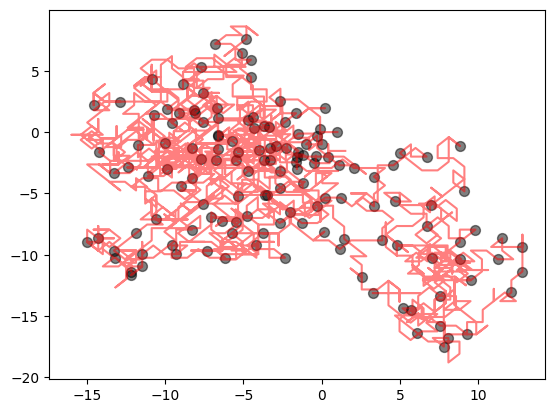

In [4]:
plt.plot(*np.array(posh).T, "r-", alpha=0.5)
plt.scatter(*space.get_centers(nonzero=True).T, color="black", alpha=0.5, s=50)
plt.show()

In [5]:
space.get_centers(nonzero=True)

array([[ 1.        ,  0.        ],
       [ 0.        , -1.        ],
       [-1.        , -1.        ],
       [ 0.41421354, -2.        ],
       [-0.29289323, -0.29289323]], dtype=float32)

In [19]:
for _ in range(1000):
    brain([0.2, 0.3], 0., 0.)
print(pcnn_.get_wff().sum())

1059.3906


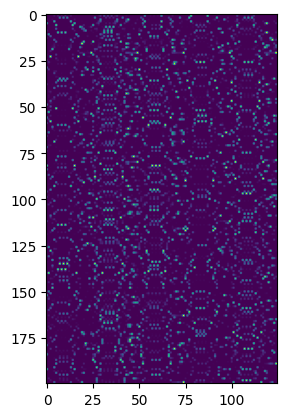

In [20]:
plt.imshow(pcnn_.get_wff(), cmap="viridis");

## pcnn model

In [2]:
N = 30
nj = 12
Nj = nj**2

""" TRAJECTORY """

duration = 100
dx = 0.1
trajectory = np.stack((np.arange(duration),
                       np.zeros(duration))) * 0.1
tot = 7

xfilterr = pclib.RandLayer(Nj)
pcnn2Dr = pclib.PCNNrand(N=N, Nj=Nj,
                    gain=4., offset=1.4,
                    clip_min=0.09,
                    threshold=0.5,
                    rep_threshold=0.4,
                    rec_threshold=0.1,
                    num_neighbors=8, trace_tau=0.1,
                    xfilter=xfilterr, name="2D")


xfilter = pclib.PCLayer(n=nj, sigma=0.03, bounds=np.array([0, 1, 0, 1]))
pcnn2D = pclib.PCNN(N=N, Nj=Nj,
                    gain=4., offset=1.4,
                    clip_min=0.09,
                    threshold=0.5,
                    rep_threshold=0.4,
                    rec_threshold=0.1,
                    num_neighbors=8, trace_tau=0.1,
                    xfilter=xfilter, name="2D")

activityr = np.zeros((Nj, duration))
activity = np.zeros((Nj, duration))

for i, x in enumerate(trajectory.T):
    
    activityr[:, i] = xfilterr(x)
    activity[:, i] = xfilter(x)
    pcnn2Dr(x)
    pcnn2D(x)
    pcnn2Dr.update()
    pcnn2D.update()

logger()

2024-12-06 21:31:25 | 


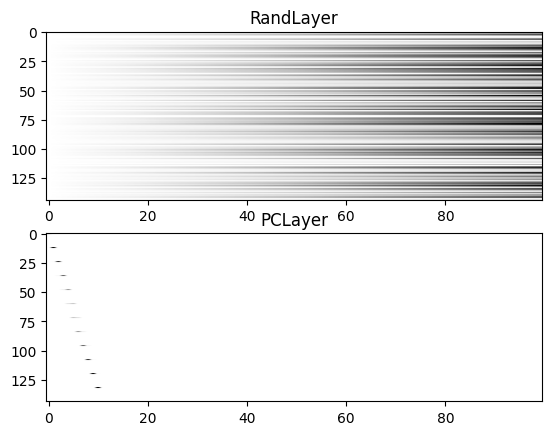

In [3]:
plt.subplot(211)
plt.imshow(activityr, cmap="Greys", aspect="auto")
plt.title(f"{xfilterr}")
plt.subplot(212)
plt.imshow(activity, cmap="Greys", aspect="auto")
plt.title(f"{xfilter}")
plt.show()

In [4]:
w = xfilterr.get_centers()
w1, w2 = w.T

In [5]:
w1.reshape(1, -1) @ w2.reshape(-1, 1)

array([[1.0477379e-09]], dtype=float32)

In [7]:
w2.sum()

0.99999994

In [8]:
xfilterr(np.array([0., 0.]))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## simulation

In [2]:
sim_settings = rc.sim_settings
agent_settings = rc.agent_settings
model_params = rc.model_params

In [3]:
load = False

In [4]:
rc.edit_logger(level=3)

In [7]:
if load:
    sim_settings, agent_settings, model_params = utc.load_model_settings(idx=None,
                                                                         verbose=True)

    if sim_settings is None:
        load = False
        

count = 0
while True:

    logger(f"[round {count}]", level=0)

    if not load:
        sim_settings["seed"] = np.random.randint(0, 1000)
        sim_settings["init_position"] = np.random.uniform(0.1, 0.9, 2)
        sim_settings["rw_fetching"] = "deterministic"
        sim_settings["rw_position"] = np.random.uniform(0.1, 0.9, 2)
        sim_settings["rw_radius"] = 0.05
        sim_settings["plot_interval"] = 5
        sim_settings["speed"] = 0.04
        sim_settings["max_duration"] = 1000

        agent_settings["max_depth"] = 20
        agent_settings["exp_weights"] = np.array([-1., 0.2, -1., 0.2, 0.4]),

    model = rc.main(sim_settings=sim_settings,
         agent_settings=agent_settings,
         model_params=model_params)

    count += 1


2024-11-19 14:11:35 | [round 0]
2024-11-19 14:11:35 | room: square
2024-11-19 14:11:35 | plot_interval: 5
2024-11-19 14:11:35 | 1000
2024-11-19 14:11:35 | N=80
2024-11-19 14:11:35 | Nj=169
2024-11-19 14:11:35 | Reward(deterministic, static)
2024-11-19 14:12:45 | [round 1]
2024-11-19 14:12:45 | room: square
2024-11-19 14:12:45 | plot_interval: 5
2024-11-19 14:12:45 | 1000
2024-11-19 14:12:45 | N=80
2024-11-19 14:12:45 | Nj=169
2024-11-19 14:12:45 | Reward(deterministic, static)
2024-11-19 14:13:47 | [round 2]
2024-11-19 14:13:47 | room: square
2024-11-19 14:13:47 | plot_interval: 5
2024-11-19 14:13:47 | 1000
2024-11-19 14:13:47 | N=80
2024-11-19 14:13:47 | Nj=169
2024-11-19 14:13:47 | Reward(deterministic, static)


KeyboardInterrupt: 

In [10]:
model.__str__()

'<mod_core.Brain object at 0x13015b290>'

## orthonormal basis

In [13]:
def make_orthonormal(matrix):
    v1, v2 = matrix.T
    v2 = v2 - (v1 @ v2) / (v1 @ v1) * v1
    matrix[:, 0] = v1
    matrix[:, 1] = v2
    for i in range(len(matrix.T)):
        matrix[i, :] /= matrix[i, :].sum()
    return matrix

    for i in range(len(matrix)):
        if matrix[i, 1] < 0:
            if np.random.random() < 0.5:
                matrix[i, 1] = 0
            else:
                matrix[i, 1] *= -1
                matrix[i, 0] = 0
                
    return matrix


def cos_mv(matrix, vector):
    # Normalize the matrix and vector
    matrix_norms = np.linalg.norm(matrix, axis=1, keepdims=True)
    vector_norm = np.linalg.norm(vector)
    
    # Avoid division by zero
    matrix_norms[matrix_norms == 0] = 1
    vector_norm = max(vector_norm, 1)
    
    # Compute cosine similarity
    return np.dot(matrix, vector) / (matrix_norms.flatten() * vector_norm)

def dist(matrix, vector):
    return np.exp(-np.linalg.norm(matrix - vector, axis=1))

In [124]:
a.T

array([[3., 9.],
       [1., 7.]])

In [132]:
a = np.around(np.random.rand(2, 2), 1) * 10
z = np.around(np.random.rand(2), 1) * 10
a, z, cos_mv(a, z)

(array([[ 9., 10.],
        [ 2.,  2.]]),
 array([7., 5.]),
 array([0.97638994, 0.98639392]))

In [4]:
""" data """

duration = 10
dx = 0.1
X = np.stack((np.arange(duration) * dx, np.zeros(duration))).reshape(-1, 2, 1)

In [14]:
""" model core """

N = 3
Nj = 5

wl1 = make_orthonormal(np.random.rand(Nj, 2))
wff = np.zeros((N, Nj))

In [8]:
""" run """

# 1
yl1 = wl1 @ X[0]
wff[0] += yl1.flatten() - wff[0]
y1 = dist(wff, yl1.flatten())
print(f"{yl1.T=}\n{wff=}\n{y1.T}")


# 2
yl2 = wl1 @ X[1]
wff[1] += yl2.flatten() - wff[0]

y2 = dist(wff, yl2.flatten())

print(f"\n{yl2.T=}\n{wff=}\n{y2.T}")

yl1.T=array([[ 0.00750604, -0.09944441,  0.00454906,  0.02568798, -0.02588857]])
wff=array([[ 0.00750604, -0.09944441,  0.00454906,  0.02568798, -0.02588857],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])
[1.         0.89916913 0.89916913]

yl2.T=array([[0.20750604, 0.10055559, 0.02656407, 0.20549207, 0.08683678]])
wff=array([[ 0.00750604, -0.09944441,  0.00454906,  0.02568798, -0.02588857],
       [ 0.2       ,  0.2       ,  0.02201501,  0.17980408,  0.11272535],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])
[0.70167168 0.89916913 0.72474383]


In [15]:
wl1

array([[ 0.68642833,  0.31357167],
       [ 0.34675172,  0.65324828],
       [ 0.29309605,  0.50138846],
       [ 0.01488249,  0.47337545],
       [ 0.88203544, -0.42489928]])

In [200]:
wff - yl.reshape(1, -1)

array([[-2.00000000e-01, -1.36782536e-01, -1.00000000e-01,
        -1.09954685e-01, -2.06308502e-01],
       [ 0.00000000e+00, -3.67825358e-02,  2.77555756e-17,
         2.77555756e-17, -4.94110861e-02],
       [-2.00000000e-01, -2.36782536e-01, -2.00000000e-01,
        -2.00000000e-01, -2.49411086e-01]])

In [9]:
class Model:

    def __init__(self, N, Nj, beta, alpha, sigma, threshold):
        self.beta = beta
        self.alpha = alpha
        self.sigma = sigma
        self.threshold = threshold

        self.wxf = make_orthonormal(np.random.rand(Nj, 2))
        self.wff = np.zeros((N, Nj))
        self.N = N
        self.count = 0

    def __call__(self, x):
        x = self.wxf @ x
        u = np.exp(-((self.wff - x.reshape(1, -1))**2).sum(axis=1) / (self.sigma))
        u[self.count:] = 0.
        #print(u)
        if u.max() > self.threshold and self.count > 0
            #print(f"{u.argmax()} is above [{u.max():.3f}]")
            return u
        if self.count == self.N:
            print("/full")
            return np.zeros(self.N)
        self._update(x=x.flatten())
        return np.zeros(self.N)

    def _update(self, x):
        self.wff[self.count, :] += (x - self.wff[self.count, :])
        self.count += 1
        print(f"+1 | {self.wff[self.count-1]}")

In [10]:
""" data """

duration = 20
dx = 0.1
X = np.stack((np.arange(1, duration+1) * dx, np.zeros(duration))).T


+1 | [0.17581584 0.07832773 0.06049412 0.02823296 0.01413994 0.05877934
 0.01769154 0.09637979 0.00304787 0.06429924]
+1 | [0.87907921 0.39163866 0.30247062 0.14116478 0.07069969 0.29389668
 0.08845768 0.48189895 0.01523933 0.32149622]
+1 | [1.58234258 0.70494959 0.54444712 0.2540966  0.12725944 0.52901402
 0.15922383 0.8674181  0.0274308  0.57869319]
+1 | [2.28560595 1.01826052 0.78642362 0.36702842 0.18381919 0.76413136
 0.22998998 1.25293726 0.03962226 0.83589016]
/full
/full
/full
/full


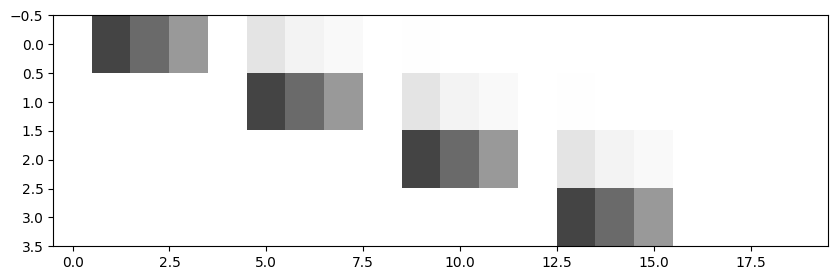

In [36]:
""" model core """

N = 4
Nj = 10
model = Model(N, Nj, 0, 0, 1, 0.5)

a = np.zeros((N, len(X)))
for i, x in enumerate(X):
    #print(f"\t\t{x.T}")
    a[:, i] = model(x.T).flatten()

plt.figure(figsize=(10, 3))
plt.imshow(a, cmap="Greys", aspect="auto", vmax=1.2)
plt.show()

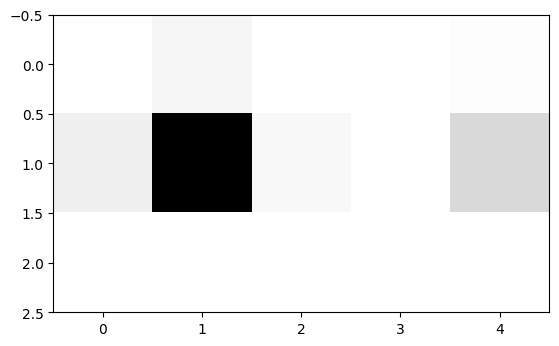

In [371]:
plt.imshow(model.wff, cmap="Greys");

## GC

In [38]:
class GC:
    def __init__(self, sigma: float, tuning: str="square", speed=1.):
        self.sigma = sigma
        self.x = 0.25
        self.y = 0.5
        self.speed = speed 
        self.tuning = tuning
        self.trajectory = []
        
    def __call__(self, vx: float, vy: float):
        self.x += vx*self.speed
        self.y += vy*self.speed
        
        if self.tuning == "square":
            self._square_tuning()
        elif self.tuning == "klein":
            self._klein_tuning()
        elif self.tuning == "klein_idk":
            self._klein_tuning_idk()
        elif self.tuning == "circle":
            self._circle_tuning()
        else:
            raise ValueError("wrong tuning bro")

        self.trajectory += [[self.x, self.y]]
        if len(self.trajectory) > 20_000:
            del self.trajectory[0]
        ux = np.exp(-((self.x-0.5)/self.sigma)**2)
        uy = np.exp(-((self.y-0.5)/self.sigma)**2)
        return ux * uy

    def _square_tuning(self):

        if self.x < 0:
            self.x += 1
        elif self.x > 1:
            self.x -= 1
        if self.y < 0:
            self.y += 1
        elif self.y > 1:
            self.y -= 1

    def _klein_tuning(self):
        if self.x < 0:
            self.x += 1
            self.y = 1 - self.y
        elif self.x > 1:
            self.x -= 1
            self.y = 1 - self.y
        if self.y < 0:
            self.y += 1
        elif self.y > 1:
            self.y -= 1

    def _klein_tuning_idk(self):
        if self.x < 0:
            self.x += 1
            self.y = 1 - self.y
        elif self.x > 1:
            self.x -= 1
            self.y = 1 - self.y
        if self.y < 0:
            self.y += 1
            self.x = 1 - self.x
        elif self.y > 1:
            self.y -= 1
            self.x = 1 - self.x

    def _hexagon(self):
        pass

    def _circle_tuning2(self):

        if (self.x - 0.5)**2 + (self.y - 0.5)**2 > 0.5:
            self.x = self.x - 2*(self.x-0.5)
            self.y = self.y - 2*(self.y-0.5)

    def _circle_tuning(self):
        # Calculate the distance from the center (0.5, 0.5)
        distance_squared = (self.x - 0.5) ** 2 + (self.y - 0.5) ** 2
    
        # Check if the point is outside the circle of radius 0.5
        if distance_squared > 0.25:  # radius^2 = 0.5^2 = 0.25
            # Normalize the vector from the center to the point
            dx = self.x - 0.5
            dy = self.y - 0.5
            magnitude = (dx**2 + dy**2)**0.5
            
            # Scale the normalized vector to move the point to the opposite side of the circle
            self.x = 0.5 - dx / magnitude * 0.5
            self.y = 0.5 - dy / magnitude * 0.5

    def render(self):

        plt.plot(*np.array(self.trajectory).T, '-', lw=0.5)
        plt.title(f"GC: {self.tuning}")
        plt.xticks(())
        plt.yticks(())
        plt.xlim((0, 1))
        plt.ylim((0, 1))

    def pos(self):
        return f"({self.x:.3f}, {self.y:.3f})"

In [16]:
# Generate the grid points
dxy = 0.025
x = np.arange(-3, 3 + dxy, dxy)
y = np.arange(-3, 3 + dxy, dxy)
xx, yy = np.meshgrid(x, y)

# Combine the grid points into a single array of coordinates
points = np.vstack([xx.ravel(), yy.ravel()]).T
points

array([[-3.   , -3.   ],
       [-2.975, -3.   ],
       [-2.95 , -3.   ],
       ...,
       [ 2.95 ,  3.   ],
       [ 2.975,  3.   ],
       [ 3.   ,  3.   ]])

(0.0072220064426977825, 0.9978760486325475)

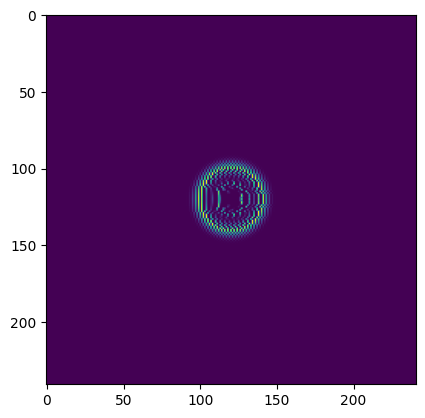

In [17]:
gc = GC(sigma=0.1, tuning="circle")
u = np.array([gc(*p) for p in points])
plt.imshow(u.reshape(int(np.sqrt(len(u))), int(np.sqrt(len(u)))));
u.mean(), u.max()

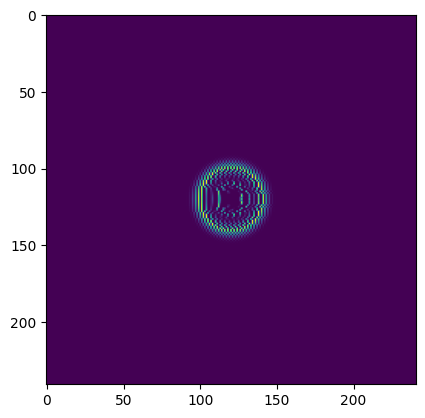

In [18]:
plt.imshow(u.reshape(int(np.sqrt(len(u))), int(np.sqrt(len(u)))));

ValueError: 'c' argument has 10201 elements, which is inconsistent with 'x' and 'y' with size 58081.

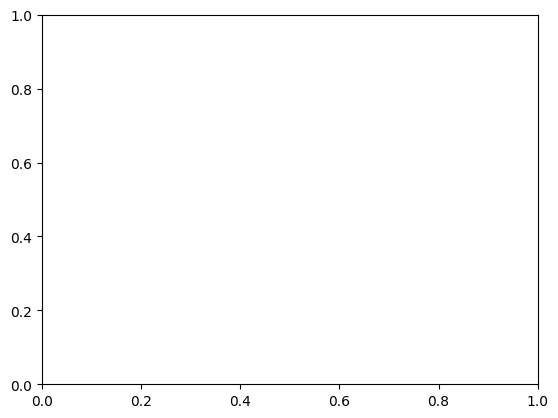

In [182]:
plt.scatter(*points.T, c=u)
plt.axis("off")
plt.show()

In [61]:
np.array(traj), a

(array([[0.21, 0.21]]), [1.5229979744712738e-08, 4.956405319172534e-08])

In [40]:
""" online """

gc = GC(sigma=0.05,
        tuning="square",
        speed=0.4)

traj = []
a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = x, y

size = 3
s = np.array([0.01, 0.01])
fig = plt.figure(figsize=(16, 8))

for t in range(200_000):
    x += s[0]
    y += s[1]
#for t, p in enumerate(points):
#    x, y = p

    
    vx = x - x0
    vy = y - y0
    x0 = x
    y0 = y

    if x <= -size: x = 2.9
    elif x >= size: x = -2.9
    if y <= -size: y = 2.9
    elif y >= size: y = -2.9
    
    traj += [[x, y]]
    a += [gc(vx, vy)]  

    if np.abs(x) > size:
        print(x, x <= -3, x >= 3)
        print("x err")
        break
    if np.abs(y) > size:
        print(y, y <= -3, y >= 3)
        print("y err")
        break

    if t % 100 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    if t % np.random.randint(100, 500) == 0:
        clear_output(wait=True)
        #ax.clear()
        plt.figure(figsize=(15, 5))
        plt.subplot(121)
        plt.scatter(*np.array(traj).T, c=a, s=10, alpha=a, cmap="Blues")
        plt.yticks(())
        plt.xticks(())
        plt.title(f"{t=} |")
        plt.ylim((-size, size))
        plt.xlim((-size, size))

        plt.subplot(122)
        gc.render()
        plt.axis('equal')
        
        plt.pause(0.001)

#clear_output(wait=True)
plt.scatter(*np.array(traj).T, c=a, s=20, alpha=0.3)
#plt.yticks(())
#plt.xticks(())
plt.title(f"{x:.3f}, {y:.3f} | {gc.pos()}")
plt.ylim((-size, size))
plt.xlim((-size, size))
#plt.a
plt.pause(0.001)
print("done")

KeyboardInterrupt: 

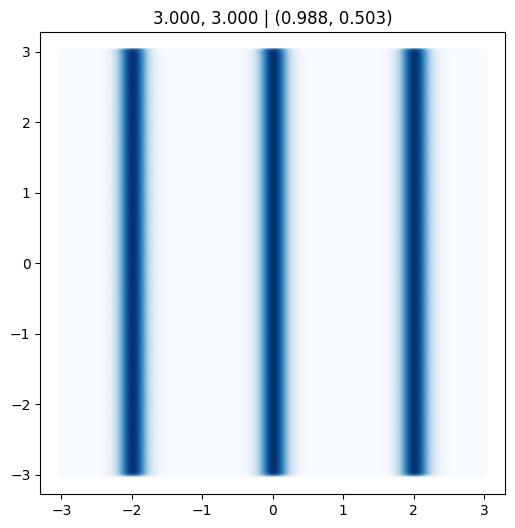

In [351]:
gc = GC(sigma=0.1,
        tuning="circle",
        speed=0.5)

traj = []
a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = x, y

size = 3
s = np.array([0.01, 0.01])

for t, p in enumerate(points):
    x, y = p
    
    vx = x - x0
    vy = y - y0
    x0, y0 = p

    #traj += [[x, y]]
    a += [gc(vx, vy)]

#clear_output(wait=True)
plt.figure(figsize=(6,6))
plt.scatter(*points.T, c=a, s=20, alpha=0.3, cmap="Blues")

plt.title(f"{x:.3f}, {y:.3f} | {gc.pos()}")
#plt.ylim((-size, size))
#plt.xlim((-size, size))
plt.axis('equal')
plt.show()

In [20]:
2*(np.random.binomial(1, 0.5, 2)-0.5)

array([-1.,  1.])

## GC II

In [2]:
gc = pcr.GridLayerWrapper(N=36, sigma=0.01, speed=0.1, init_bounds=[-1, 1+1/6, -1, 1+1/6],
                          boundary_type="square")

N = len(gc)

# Generate the grid points
dxy = 0.15

# random walk
points = [[0., 0.]]
s = np.array([dxy, dxy])
x, y = points[0]
size = 100
tot = 200_000
old_point = points[0]
activity = np.zeros((N, tot))


tra = []

for t in range(tot):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    #p = points[t]
    activity[:, t] = gc([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    old_point = points[-1]
    tra += [gc.get_positions()[0].tolist()]

points = np.array(points)

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.scatter(*points[1:].T, c=activity[i], cmap="Reds",
                s=5*activity[i]*(activity[i]>0.5), alpha=0.5)


#plt.xlim((-1.1, 1.1))
#plt.ylim((-1.1, 1.1))
#plt.axis("equal")
plt.grid()
plt.show()

[+] hexagon created
[+] GridLayer created


[[-1.         -1.        ]
 [-1.         -0.6       ]
 [-1.         -0.19999999]
 [-1.          0.20000002]
 [-1.          0.6       ]
 [-1.          1.        ]
 [-0.6        -1.        ]
 [-0.6        -0.6       ]
 [-0.6        -0.19999999]
 [-0.6         0.20000002]
 [-0.6         0.6       ]
 [-0.6         1.        ]
 [-0.19999999 -1.        ]
 [-0.19999999 -0.6       ]
 [-0.19999999 -0.19999999]
 [-0.19999999  0.20000002]
 [-0.19999999  0.6       ]
 [-0.19999999  1.        ]
 [ 0.20000002 -1.        ]
 [ 0.20000002 -0.6       ]
 [ 0.20000002 -0.19999999]
 [ 0.20000002  0.20000002]
 [ 0.20000002  0.6       ]
 [ 0.20000002  1.        ]
 [ 0.6        -1.        ]
 [ 0.6        -0.6       ]
 [ 0.6        -0.19999999]
 [ 0.6         0.20000002]
 [ 0.6         0.6       ]
 [ 0.6         1.        ]
 [ 1.         -1.        ]
 [ 1.         -0.6       ]
 [ 1.         -0.19999999]
 [ 1.          0.20000002]
 [ 1.          0.6       ]
 [ 1.          1.        ]]


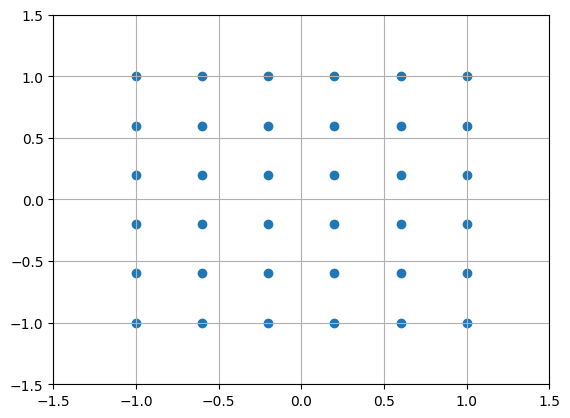

In [18]:
print(gc.get_centers())
plt.scatter(*gc.get_centers().T)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
#plt.axis('auto')
plt.grid()
plt.show()

1
2
3
4
5
6
7
8
9


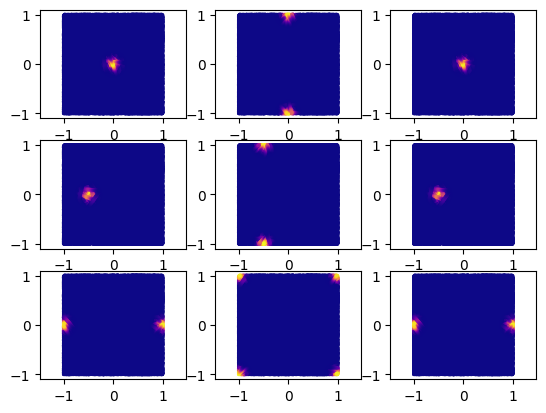

In [9]:
c = 0
for i in range(3):
    for j in range(3):
        c += 1
        plt.subplot(3, 3, c)
        plt.scatter(*np.array(tra).T, c=activity[c-1], cmap="plasma", s=3, alpha=0.5)
        plt.xlim((-1.1, 1.1))
        plt.ylim((-1.1, 1.1))
        plt.axis("equal")
        print(c)
        
plt.show()

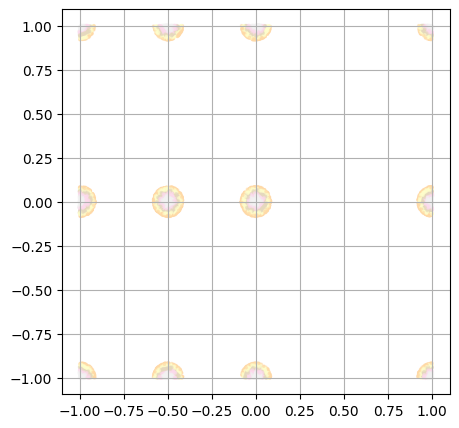

In [42]:
plt.figure(figsize=(5, 5))

for i in range(9):
    plt.scatter(*np.array(tra).T, c=activity[i], cmap="Pastel1",
                s=5*activity[i]*(activity[i]>0.5), alpha=0.5)


plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.axis("equal")
plt.grid()
plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

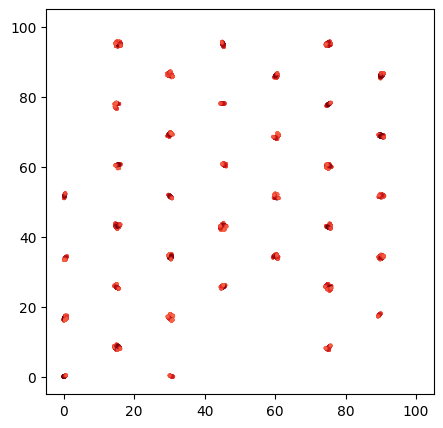

In [8]:
plt.figure(figsize=(5, 5))

for i in range(9):
    plt.scatter(*points[1:].T, c=activity[i], cmap="Reds",
                s=5*activity[i]*(activity[i]>0.5), alpha=0.5)


plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.axis("equal")
plt.grid()
plt.show()

### frequency

[+] hexagon created
[+] GridLayer created
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed


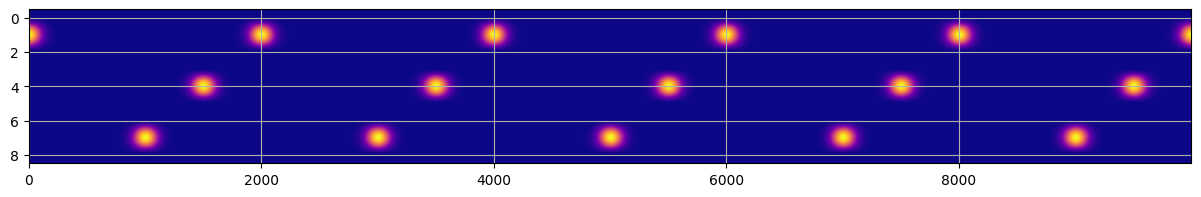

In [3]:
gc = pcr.GridLayerWrapper(N=9, sigma=0.01, speed=0.001, init_bounds=[-1, 1.33, 0, 1.33],
                          boundary_type="square")

N = len(gc)

# Generate the grid points
dxy = 1

# random walk
points = [[0., 0.]]
s = np.array([dxy, dxy])
x, y = points[0]
size = 100
tot = 10000
old_point = points[0]
activity = np.zeros((N, tot))

tra = []

for t in range(tot):
    
    x += s[0]
    #y += s[1]

    # hit wall
    #if x <= 0 or x >= size:
    #    s[0] *= -1
    #    x += s[0]
    #elif y <= 0 or y >= size:
    #    s[1] *= -1
    #    y += s[1]

    points += [[x, y]]
    #if t % 500 == 0:
    #    s = np.random.uniform(-1, 1, 2)
    #    s = 0.1 * s / np.abs(s).sum()

    #p = points[t]
    activity[:, t] = gc([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    old_point = points[-1]
    tra += [gc.get_positions()[0].tolist()]

points = np.array(points)

plt.figure(figsize=(15, 2))

plt.imshow(activity, cmap="plasma", aspect="auto")
plt.grid()
plt.show()

In [139]:
calc_lcm([1, 0.75, 0.5])

0.375

In [147]:
1000 / (0.375 * 4)

5333.333333333333

In [155]:
1 / (0.001 / 2)

2000.0

In [161]:
2 / (0.001 * calc_lcm([1, 0.75, 0.5]))

5333.333333333333

$\frac{\text{size}}{f_{1}\cdot\text{LCM}(f_{2\ldots M})}$

### calibration

[+] hexagon created
[+] GridLayer created
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[+] hexagon created
[+] GridLayer created
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed


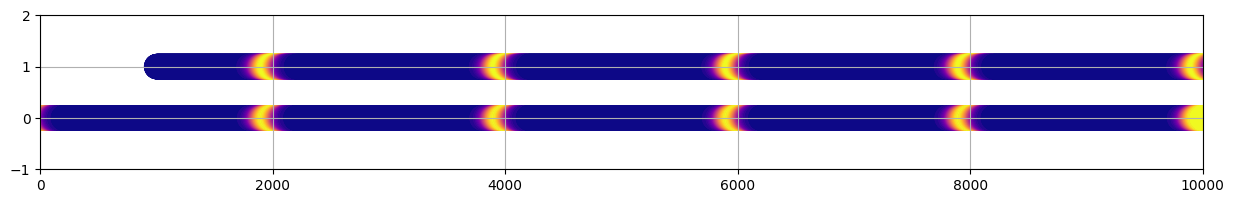

In [7]:
gc = pcr.GridLayerWrapper(N=9, sigma=0.01, speed=0.001, init_bounds=[-1, 1.33, 0, 1.33],
                          boundary_type="square")
gc2 = pcr.GridLayerWrapper(N=9, sigma=0.01, speed=0.001, init_bounds=[-1, 1.33, 0, 1.33],
                          boundary_type="square")
N = len(gc)

# Generate the grid points
dxy = 1

# random walk
points = [[0., 0.]]
points2 = [[1000., 1.]]

#gc2.calibration(points2[0][0], 0)
gc2(points2[-1])


s = np.array([dxy, dxy])
x, y = points[0]
x2, y2 = points2[0]

size = 100
tot = 10000
old_point = points[0]
old_point2 = points2[0]

activity = np.zeros((N, tot))
activity2 = np.zeros((N, tot))

for t in range(tot):
    
    x += s[0]
    x2 += s[0]
    points += [[x, y]]
    points2 += [[x2, y2]]

    activity[:, t] = gc([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    old_point = points[-1]
    
    activity2[:, t] = gc2([points2[-1][0]-old_point2[0], points2[-1][1]-old_point2[1]])
    old_point2 = points2[-1]

points = np.array(points)
points2 = np.array(points2)

plt.figure(figsize=(15, 2))

plt.scatter(*points[1:].T, c=activity[0], s=300, cmap="plasma")
plt.scatter(*points2[1:].T, c=activity2[0], s=300, cmap="plasma")

plt.xlim((0, tot))
plt.ylim((-1, 2))
plt.grid()
plt.show()

In [6]:
np.around(gc.get_centers(), 2), np.around(gc.get_positions(), 2)

(array([[ 0. , -1. ],
        [ 0. , -0. ],
        [ 0. ,  1. ],
        [ 0.5, -1. ],
        [ 0.5, -0. ],
        [ 0.5,  1. ],
        [ 1. , -1. ],
        [ 1. , -0. ],
        [ 1. ,  1. ]], dtype=float32),
 array([[-0. , -1. ],
        [-0. , -0. ],
        [-0. ,  1. ],
        [ 0.5, -1. ],
        [ 0.5, -0. ],
        [ 0.5,  1. ],
        [ 1. , -1. ],
        [ 1. , -0. ],
        [ 1. ,  1. ]], dtype=float32))

In [5]:
activity

array([[3.78350585e-44, 3.78350585e-44, 3.78350585e-44, ...,
        3.78350585e-44, 3.78350585e-44, 3.78350585e-44],
       [9.99622285e-01, 9.99322474e-01, 9.98822927e-01, ...,
        9.99284446e-01, 9.99602854e-01, 9.99721408e-01],
       [7.28675201e-44, 7.28675201e-44, 7.28675201e-44, ...,
        7.28675201e-44, 7.28675201e-44, 7.28675201e-44],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.88545355e-44, 4.90454463e-44, 3.92363570e-44, ...,
        1.09301280e-43, 8.96831017e-44, 7.42688186e-44],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## gc networks

In [2]:
gcns = pclib.GridNetwork([pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[-1, 0, -1, 0],
                              boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[0, 1, -1, 0],
                               boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[-1, 0, 0, 1],
                               boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[0, 1, 0, 1],
                               boundary_type="square")])

gcnm = pclib.GridNetwork([pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[-1, 0, -1, 0],
                              boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[0, 1, -1, 0],
                              boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[-1, 0, 0, 1],
                              boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[0, 1, 0, 1],
                              boundary_type="square")])

gcnl = pclib.GridNetwork([pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1, 0, -1, 0],
                              boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[0, 1, -1, 0],
                              boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1, 0, 0, 1],
                              boundary_type="square"),
                          pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[0, 1, 0, 1],
                              boundary_type="square")])

gcnl2 = pclib.GridNetwork([pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1+1/6, 1/6, -1+1/6, 1/6],
                              boundary_type="square"),
                           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[1/6, 1+1/6, -1+1/6, 1/6],
                              boundary_type="square"),
                           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1+1/6, 1/6, 1/6, 1+1/6],
                              boundary_type="square"),
                           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[1/6, 1+1/6, 1/6, 1+1/6],
                              boundary_type="square")])
                          

# Generate the grid points
dxy = 0.15

# random walk
points = [[0., 0.]]
s = np.array([dxy, dxy])
x, y = points[0]
size = 100
tot = 100_000
old_point = points[0]

# record
activitys = np.zeros((len(gcns), tot))
activitym = np.zeros((len(gcnm), tot))
activityl = np.zeros((len(gcnl), tot))
activityl2 = np.zeros((len(gcnl2), tot))

large_acc = np.zeros((len(gcns)+len(gcnm)+len(gcnl)+len(gcnl2), 1000))
large_acc_sum = np.zeros(1000)

for t in range(tot):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    activitys[:, t] = gcns([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    activitym[:, t] = gcnm([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    activityl[:, t] = gcnl([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    activityl2[:, t] = gcnl2([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    
    large_acc[:, :-1] = large_acc[:, 1:]
    large_acc[:, -1] = np.hstack((activitys[:, t], activitym[:, t], activityl[:, t], activityl2[:, t]))
    large_acc_sum[:-1] = large_acc_sum[1:]
    large_acc_sum[-1] = large_acc[:, -1].sum()

    if t % 50 == 0:
        clear_output(wait=True)
        plt.imshow(large_acc, cmap="plasma", aspect="auto")
        plt.plot(range(len(large_acc_sum)), len(large_acc) - large_acc_sum*10, '-', color="white", lw=2)
        plt.axis('off')
        plt.title(f"t={t/100}s  [intensity={large_acc_sum[-1]:.3f}]")
        plt.pause(0.001)
    
    old_point = points[-1]

points = np.array(points)
logger()

KeyboardInterrupt: 

In [78]:
np.prod([2, 3, 4])

24

In [80]:
1 % 0.24

0.040000000000000036

In [133]:
def calc_lcm(v: list):
    maxv = np.max(v)
    lcm = np.prod(v)
    for u in np.arange(maxv, np.prod(v), maxv):
        c = 0
        for vi in v:
            if u % vi == 0.0:
                c += 1
                continue
            break
        if c == len(v):
            lcm = u
            break

    return lcm

In [95]:
1/0.05

20.0

In [100]:
1/calc_lcm([1/0.09, 1/0.05, 1/0.025])

0.0001125

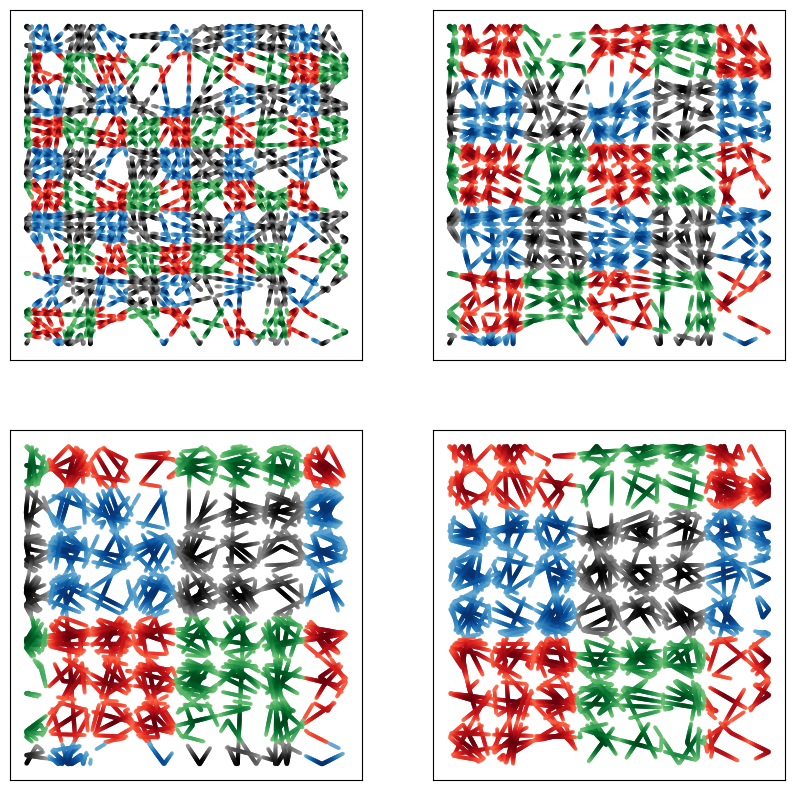

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs, axm, axl, axl2 = axs.flatten()
points = np.array(points)
nl = 9
colors = ('Reds', 'Blues', 'Greens', 'Greys', 'Purples')
for l in range(gcns.get_num_layers()):
    for i in range(9):
        axs.scatter(*points[1:].T, c=activitys[l*nl:(l+1)*nl][i], cmap=colors[l],
                s=5*activitys[l*nl:(l+1)*nl][i]*(activitys[l*nl:(l+1)*nl][i]>0.5), alpha=0.3)

axs.set_xticks(())
axs.set_yticks(())

for l in range(gcnm.get_num_layers()):
    for i in range(9):
        axm.scatter(*points[1:].T, c=activitym[l*nl:(l+1)*nl][i], cmap=colors[l],
                s=5*activitym[l*nl:(l+1)*nl][i]*(activitym[l*nl:(l+1)*nl][i]>0.5), alpha=0.3)
 
axm.set_xticks(())
axm.set_yticks(())

for l in range(gcnl.get_num_layers()):
    for i in range(9):
        axl.scatter(*points[1:].T, c=activityl[l*nl:(l+1)*nl][i], cmap=colors[l],
                s=5*activityl[l*nl:(l+1)*nl][i]*(activityl[l*nl:(l+1)*nl][i]>0.5), alpha=0.3)
 
axl.set_xticks(())
axl.set_yticks(())

for l in range(gcnl.get_num_layers()):
    for i in range(9):
        axl2.scatter(*points[1:].T, c=activityl2[l*nl:(l+1)*nl][i], cmap=colors[l],
                s=5*activityl2[l*nl:(l+1)*nl][i]*(activityl2[l*nl:(l+1)*nl][i]>0.5), alpha=0.3)
 
axl2.set_xticks(())
axl2.set_yticks(())

plt.show()

In [56]:
fig.savefig(r'/Users/daniekru/Research/lab/x404proj/grid_modules_a.png', dpi=100)
#logger("saved")

In [3]:
gc_list = [
    pclib.GridLayer(16, 0.01, 0.7, "square", "square"),
    pclib.GridLayer(16, 0.04, 0.7, "square", "random_square"),
    pclib.GridLayer(16, 0.01, 0.7, "hexagon", "random_circle"),
]
gcn = pclib.GridNetwork(gc_list)

[+] hexagon created
11:56:59 | MAIN | [0, 0.25, 0.5, 0.75]
11:56:59 | MAIN | [0, 0.25, 0.5, 0.75]
xi: 0.000000, yi: 0.000000
xi: 0.000000, yi: 0.250000
xi: 0.000000, yi: 0.500000
xi: 0.000000, yi: 0.750000
xi: 0.250000, yi: 0.000000
xi: 0.250000, yi: 0.250000
xi: 0.250000, yi: 0.500000
xi: 0.250000, yi: 0.750000
xi: 0.500000, yi: 0.000000
xi: 0.500000, yi: 0.250000
xi: 0.500000, yi: 0.500000
xi: 0.500000, yi: 0.750000
xi: 0.750000, yi: 0.000000
xi: 0.750000, yi: 0.250000
xi: 0.750000, yi: 0.500000
xi: 0.750000, yi: 0.750000
Boundary type: square
Positions type: square
[+] GridLayer created
[+] hexagon created
Boundary type: square
Positions type: random_square
[+] GridLayer created
[+] hexagon created
Boundary type: hexagon
Positions type: random_circle
[+] GridLayer created
[+] GridNetwork created
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-

#### fewer layers

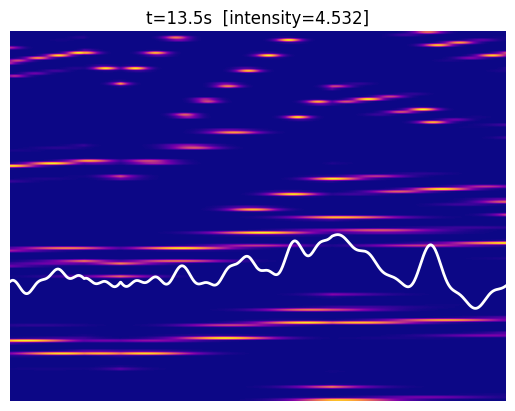

KeyboardInterrupt: 

In [2]:
gcns = pclib.GridNetwork([pclib.GridLayer(N=36, sigma=0.04, speed=0.1, init_bounds=[-1, 1, -1, 1],
                              boundary_type="square")])

gcnm = pclib.GridNetwork([pclib.GridLayer(N=36, sigma=0.04, speed=0.05, init_bounds=[-1, 1, -1, 1],
                              boundary_type="square")])

gcnl = pclib.GridNetwork([pclib.GridLayer(N=36, sigma=0.04, speed=0.025, init_bounds=[-1, 1, -1, 1],
                              boundary_type="square")])

gcnl2 = pclib.GridNetwork([pclib.GridLayer(N=36, sigma=0.04, speed=0.025, init_bounds=[-1+1/6, 1+1/6, -1+1/6, 1+1/6],
                              boundary_type="square")])
                          

# Generate the grid points
dxy = 0.15

# random walk
points = [[0., 0.]]
s = np.array([dxy, dxy])
x, y = points[0]
size = 100
tot = 100_000
old_point = points[0]

# record
activitys = np.zeros((len(gcns), tot))
activitym = np.zeros((len(gcnm), tot))
activityl = np.zeros((len(gcnl), tot))
activityl2 = np.zeros((len(gcnl2), tot))

large_acc = np.zeros((len(gcns)+len(gcnm)+len(gcnl)+len(gcnl2), 1000))
large_acc_sum = np.zeros(1000)

for t in range(tot):
    
    x += s[0]
    y += s[1]

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    points += [[x, y]]
    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    activitys[:, t] = gcns([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    activitym[:, t] = gcnm([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    activityl[:, t] = gcnl([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    activityl2[:, t] = gcnl2([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    
    large_acc[:, :-1] = large_acc[:, 1:]
    large_acc[:, -1] = np.hstack((activitys[:, t], activitym[:, t], activityl[:, t], activityl2[:, t]))
    large_acc_sum[:-1] = large_acc_sum[1:]
    large_acc_sum[-1] = large_acc[:, -1].sum()

    if t % 50 == 0:
        clear_output(wait=True)
        plt.imshow(large_acc, cmap="plasma", aspect="auto")
        plt.plot(range(len(large_acc_sum)), len(large_acc) - large_acc_sum*10, '-', color="white", lw=2)
        plt.axis('off')
        plt.title(f"t={t/100}s  [intensity={large_acc_sum[-1]:.3f}]")
        plt.pause(0.001)
    
    old_point = points[-1]

points = np.array(points)
logger()

In [4]:
a = np.zeros((len(gcn), len(points)))
old_points = points[0]
for i, p in enumerate(points[1:]):
    a[:, i] = gcn(p-old_point)
    old_point = p


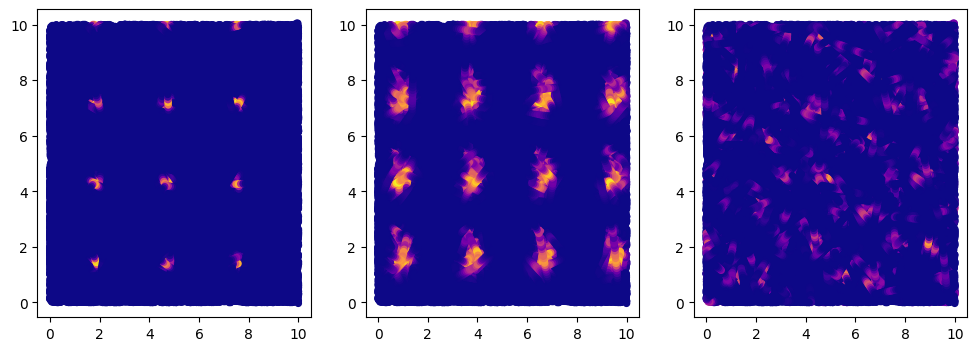

In [5]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(points[1:, 0], points[1:, 1], c=a[3, :-1], cmap="plasma", s=20)

plt.subplot(132)
plt.scatter(points[1:, 0], points[1:, 1], c=a[9:18, :-1].sum(axis=0), cmap="plasma", s=20)

plt.subplot(133)
plt.scatter(points[1:, 0], points[1:, 1], c=a[-9:, :-1].sum(axis=0), cmap="plasma", s=20)
plt.show()

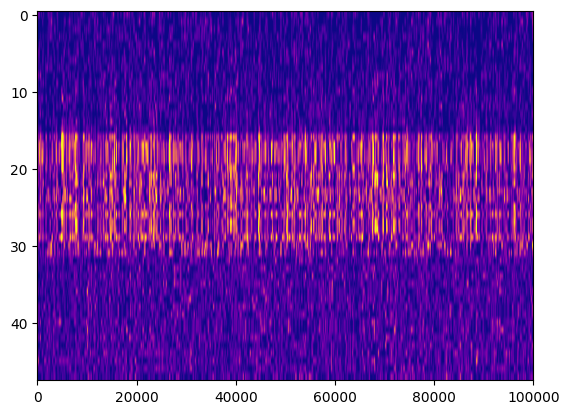

In [6]:
plt.imshow(a, aspect="auto", cmap="plasma", vmax=0.1);

### hexagon

In [3]:
""" online """

#hexagon = pcr.pclib.Hexagon()
gch = pcr.pclib.GridLayer(9, 0.1, 0.3, "hexagon")
#hcc = np.array(hexagon.get_centers()+[hexagon.get_centers()[0]])


a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = 0.2, 0.2
traj = [[x, y]]
acc = []
posj = [gch.get_positions()[0]]

size = 20
s = np.array([0.005, 0.005])
fig = plt.figure(figsize=(16, 8))

for t in range(200_000):
    
    x += s[0]
    y += s[1]
    
    # hexagon boundaries & gc
    #x, y = hexagon(x, y)
    acc += [gch([x - x0, y - y0])[4]]
    posj += [gch.get_positions()[4]]

    x0 = x
    y0 = y

    
    if t % 20 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    if t % 80 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 4))
        plt.subplot(121)
        #plt.plot(*np.array(traj).T, '-k', alpha=1., lw=1.)
        plt.scatter(*np.array(traj).T, c=acc, s=3, cmap="plasma", vmin=0, vmax=0.4)
        plt.title(f"{t=} | {x:.3f}, {y:.3f}")
        plt.ylim((0., size))
        plt.xlim((0., size))
        plt.axis("equal")

        plt.subplot(122)
        plt.scatter(*np.array(posj).T, s=2)
        plt.title(f"a: {acc[-1]:.3f}")
        plt.xlim((-1.1, 1.1))
        plt.ylim((-1.1, 1.1))
        plt.axis("equal")
        
        plt.pause(0.001)


    traj += [[x, y]]


print("done")

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. libs.pclib.GridLayer(N: int, sigma: float, speed: float, init_bounds: Annotated[list[float], FixedSize(4)], boundary_type: str = 'square', basis_type: str = 'square')

Invoked with: 9, 0.1, 0.3, 'hexagon'

### online GCNetwork

In [4]:
""" online """

#hexagon = pcr.pclib.Hexagon()
gc_list = [
    pclib.GridLayer(25, 0.05, 0.9, "square", "square"),
    #pclib.GridLayer(25, 0.2, 0.7, "square", "random_square"),
    #pclib.GridLayer(25, 0.03, 0.9, "hexagon", "random_circle"),
]
gcn = pclib.GridNetwork(gc_list)


a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = 0.2, 0.2
traj = [[x, y]]
acc = np.zeros((len(gcn), 100))

size = 20
s = np.array([0.005, 0.005])
fig = plt.figure(figsize=(16, 8))

for t in range(200_000):
    
    x += s[0]
    y += s[1]
    
    # hexagon boundaries & gc
    #x, y = hexagon(x, y)
    acc[:, :-1] = acc[:, 1:]
    acc[:, -1] = gcn([x - x0, y - y0]).flatten()
    #posj += [gch.get_positions()[4]]

    x0 = x
    y0 = y

    
    if t % 20 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    if t % 10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 4))
        plt.subplot(121)
        plt.plot(*np.array(traj).T, '-k', lw=0.5)
        plt.title(f"{t=} | {x:.3f}, {y:.3f}")
        plt.ylim((0., size))
        plt.xlim((0., size))
        #plt.axis("equal")

        plt.subplot(122)
        plt.imshow(acc, cmap="plasma", aspect="auto")
        plt.title(f"a: {acc[-1].mean():.3f}")
        #plt.xlim((-1.1, 1.1))
        #plt.ylim((-1.1, 1.1))
        #plt.axis("equal")
        
        plt.pause(0.001)


    traj += [[x, y]]


print("done")

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. libs.pclib.GridLayer(N: int, sigma: float, speed: float, init_bounds: Annotated[list[float], FixedSize(4)], boundary_type: str = 'square', basis_type: str = 'square')

Invoked with: 25, 0.05, 0.9, 'square', 'square'

In [6]:
""" online """

#hexagon = pcr.pclib.Hexagon()
gc_list = [
    pclib.GridLayer(25, 0.05, 0.9, "square", "square"),
    #pclib.GridLayer(25, 0.2, 0.7, "square", "random_square"),
    #pclib.GridLayer(25, 0.03, 0.9, "hexagon", "random_circle"),
]
gcn = pclib.GridNetwork(gc_list)


a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = 0.2, 0.2
traj = [[x, y]]
acc = np.zeros((len(gcn), 100))

size = 20
s = np.array([0.005, 0.005])
fig = plt.figure(figsize=(16, 8))

for t in range(200_000):
    
    x += s[0]
    y += s[1]
    
    # hexagon boundaries & gc
    #x, y = hexagon(x, y)
    acc[:, :-1] = acc[:, 1:]
    acc[:, -1] = gcn([x - x0, y - y0]).flatten()
    #posj += [gch.get_positions()[4]]

    x0 = x
    y0 = y

    
    if t % 20 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    if t % 10 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 4))
        plt.subplot(121)
        plt.plot(*np.array(traj).T, '-k', lw=0.5)
        plt.title(f"{t=} | {x:.3f}, {y:.3f}")
        plt.ylim((0., size))
        plt.xlim((0., size))
        #plt.axis("equal")

        plt.subplot(122)
        plt.imshow(acc, cmap="plasma", aspect="auto")
        plt.title(f"a: {acc[-1].mean():.3f}")
        #plt.xlim((-1.1, 1.1))
        #plt.ylim((-1.1, 1.1))
        #plt.axis("equal")
        
        plt.pause(0.001)


    traj += [[x, y]]


print("done")

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. libs.pclib.GridLayer(N: int, sigma: float, speed: float, init_bounds: Annotated[list[float], FixedSize(4)], boundary_type: str = 'square', basis_type: str = 'square')

Invoked with: 25, 0.05, 0.9, 'square', 'square'

In [16]:
pp.shape

(16, 2)

In [9]:
len(gcn)

75

## Hex grid layer

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 150000/150000 [00:01<00:00, 86124.83it/s]


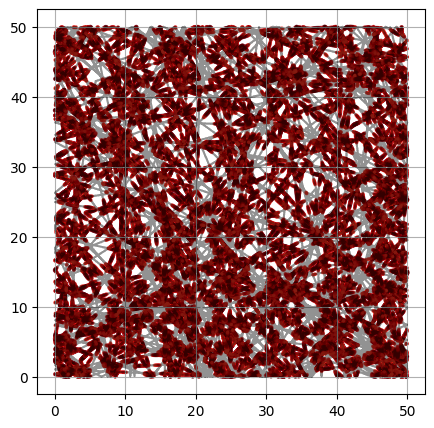

In [70]:
gch = pclib.GridHexLayer(sigma=0.04, speed=0.2)

N = len(gch)

# Generate the grid points
dxy = 1

# random walk
points = [[0., 0.]]
s = np.array([dxy, dxy])
x, y = points[0]
size = 50
tot = 150_000
old_point = points[0]
activity = np.zeros((N, tot))


tra = [gch.get_positions()]

for t in tqdm(range(tot)):
    
    x += s[0]
    y += s[1]

    # hit wall
    if True:
        if x <= 0 or x >= size:
            s[0] *= -1
            x += s[0]
        elif y <= 0 or y >= size:
            s[1] *= -1
            y += s[1]

    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()
            
    points += [[x, y]]

    #p = points[t]
    activity[:, t] = gch([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    old_point = points[-1]
    tra += [gch.get_positions()]

points = np.array(points)
tra = np.array(tra)

plt.figure(figsize=(5, 5))
for i in range(N):
    plt.plot(*points[1:].T, '-k', alpha=0.02)
    plt.scatter(*points[1:].T, c=activity[i], cmap="Reds",
                s=5*activity[i]*(activity[i]>0.5), alpha=0.5, vmax=0.8)


#plt.xlim((-1.1, 1.1))
#plt.ylim((-1.1, 1.1))
#plt.axis("equal")
plt.grid()
plt.show()

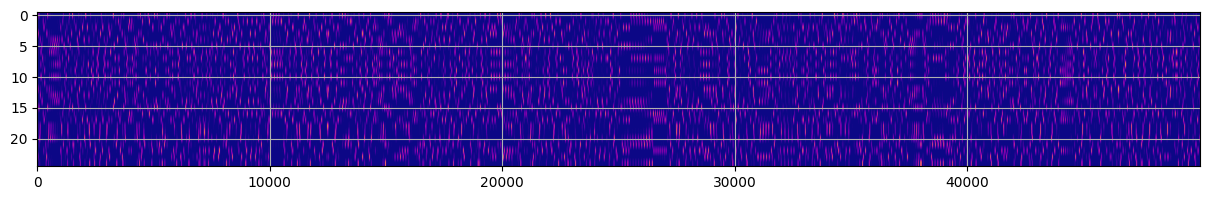

In [64]:
plt.figure(figsize=(15, 2))

plt.imshow(activity[:, :50000], cmap="plasma", aspect="auto")
plt.grid()
plt.show()

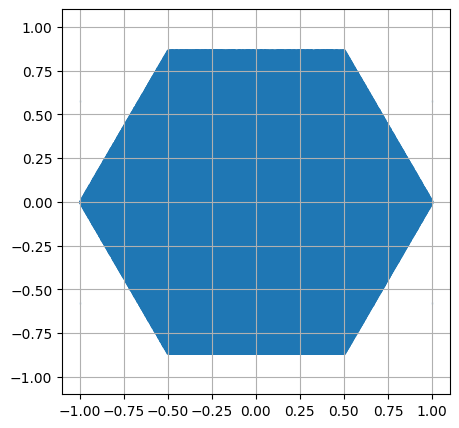

[[0.0, 0.5773503184318542],
 [0.5, 0.2886751592159271],
 [0.5, -0.2886751592159271],
 [0.0, -0.5773503184318542],
 [-0.5, -0.2886751592159271],
 [-0.5, 0.2886751592159271],
 [-0.5, 0.866025447845459],
 [0.5, 0.866025447845459],
 [1.0, 0.0],
 [0.5, -0.866025447845459],
 [-0.5, -0.866025447845459],
 [-1.0, 0.0],
 [0.0, 1.1547006368637085],
 [1.0, 0.5773503184318542],
 [1.0, -0.5773503184318542],
 [0.0, -1.1547006368637085],
 [-1.0, -0.5773503184318542],
 [-1.0, 0.5773503184318542],
 [-0.5, 1.4433757066726685],
 [1.0, 1.1547006368637085],
 [1.5, -0.2886751592159271],
 [0.5, -1.4433757066726685],
 [-1.0, -1.1547006368637085],
 [-1.5, 0.2886751592159271],
 [0.0, 0.0]]

In [51]:
plt.figure(figsize=(5, 5))
#plt.scatter(*np.array(gch.get_centers()).T, color='red', s=50)
colors = plt.cm.tab10(np.linspace(0, 1, 7))
for i in range(1):
    plt.scatter(*tra.T, alpha=0.1, s=1, color=colors[i])
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()

gch.get_centers()

In [6]:
N

25

[+] hexagon created
[+] GridHexLayer created
[-] GridHexLayer destroyed
[-] hexagon destroyed


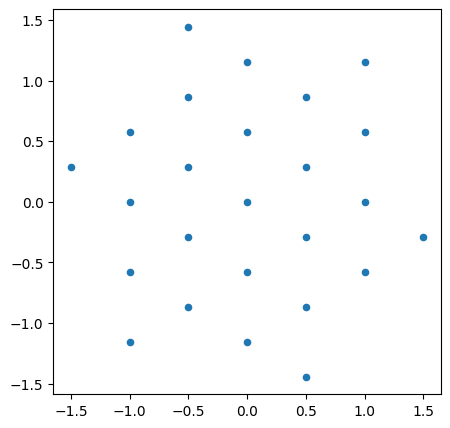

In [6]:
gch = pclib.GridHexLayer(sigma=0.01, speed=0.1)

plt.figure(figsize=(5, 5))
plt.scatter(*np.array(gch.get_centers()).T, s=20)
plt.show()

In [54]:
activity.min()

4.573872865876183e-05

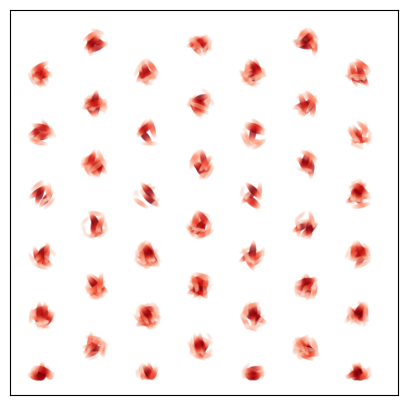

In [73]:
plt.figure(figsize=(5, 5))

i=20
plt.scatter(*np.array(points[1:]).T, c=activity[i], cmap="Reds", s=20*activity[i]*(activity[i]>0.1), alpha=0.1)
plt.xticks(())
plt.yticks(())
plt.show()

In [46]:
activity.shape

(75, 10000)

In [45]:
np.array(points).shape

(10001, 2)

### network

[-] GridNetworkSq destroyed


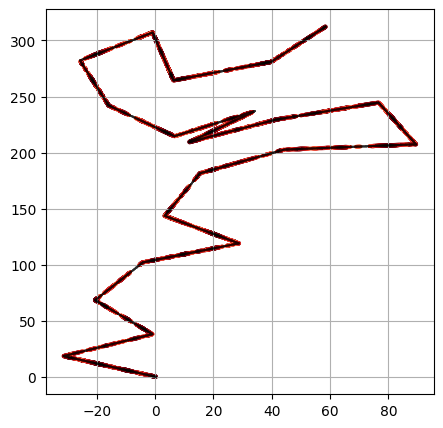

In [24]:
gcn = pclib.GridHexNetwork([pclib.GridHexLayer(sigma=0.04, speed=0.1),
                            pclib.GridHexLayer(sigma=0.04, speed=0.05),
                            pclib.GridHexLayer(sigma=0.04, speed=0.025)])


N = len(gcn)

# Generate the grid points
dxy = 0.15

# random walk
points = [[0., 0.]]
s = np.array([dxy, dxy])
x, y = points[0]
size = 100
tot = 10000
old_point = points[0]
activity = np.zeros((N, tot))


tra = []

for t in range(tot):
    
    x += s[0]
    y += s[1]

    # hit wall
    if False:
        if x <= 0 or x >= size:
            s[0] *= -1
            x += s[0]
        elif y <= 0 or y >= size:
            s[1] *= -1
            y += s[1]

    if t % 500 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()
            
    points += [[x, y]]

    #p = points[t]
    activity[:, t] = gcn([points[-1][0]-old_point[0], points[-1][1]-old_point[1]])
    old_point = points[-1]
    tra += [gcn.get_positions()]

points = np.array(points)
tra = np.array(tra)

plt.figure(figsize=(5, 5))
for i in range(N):
    plt.plot(*points[1:].T, '-k', alpha=0.02)
    plt.scatter(*points[1:].T, c=activity[i], cmap="Reds",
                s=5*activity[i]*(activity[i]>0.5), alpha=0.5)


#plt.xlim((-1.1, 1.1))
#plt.ylim((-1.1, 1.1))
#plt.axis("equal")
plt.grid()
plt.show()

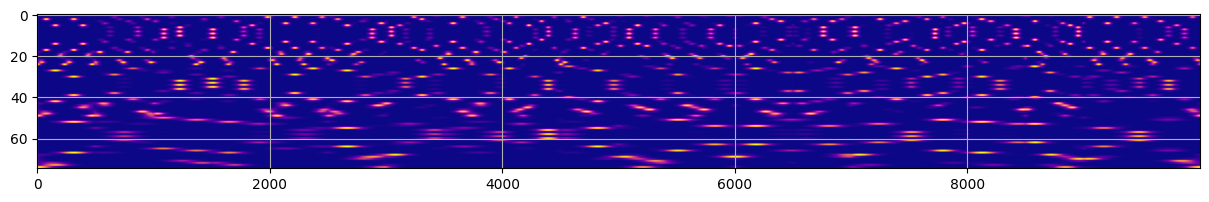

In [25]:
plt.figure(figsize=(15, 2))

plt.imshow(activity, cmap="plasma", aspect="auto")
plt.grid()
plt.show()

---
## action sampling

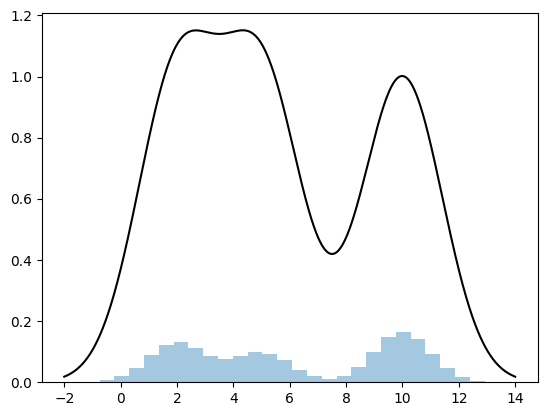

In [39]:
m = (2, 5, 10)
X = np.linspace(-2, 14, 100_000)
yt = [np.exp(-((x-m[0])/2)**2)+np.exp(-((x-m[1])/2)**2)+np.exp(-((x-m[2])/2)**2) for x in X]
yt
#yt /= sum(yt)
#
Z = np.random.uniform(-2, 14, len(X))
ys = []
for z in Z:
    for mi in m:
        if z < mi:
            ys += [np.random.normal(mi, 1)]
            break

ys = np.array(ys)

#
plt.plot(X, yt, '-k')
plt.hist(ys, bins=30, density=True, alpha=0.4)
plt.show()

## pcnn

In [9]:
N = 20


xfilter = pclib.GridNetwork([
            pclib.GridLayer(25, 0.05, 0.9, "square", "square"),
            pclib.GridLayer(25, 0.2, 0.7, "square", "random_square"),
            pclib.GridLayer(25, 0.03, 0.9, "hexagon", "random_circle")])
Nj = len(xfilter)
pcnn2d = pclib.PCNNgrid(N=N, Nj=Nj, gain=3., offset=1.,
                    clip_min=0.09,
                    threshold=0.07,
                    rep_threshold=0.1,
                    rec_threshold=0.1,
                    num_neighbors=8, trace_tau=0.1,
                    xfilter=xfilter, name="2D")


[+] hexagon created
18:54:08 | MAIN | [-0.8, -0.4, 0, 0.4, 0.8]
18:54:08 | MAIN | [-0.8, -0.4, 0, 0.4, 0.8]
xi: -0.800000, yi: -0.800000
xi: -0.800000, yi: -0.400000
xi: -0.800000, yi: 0.000000
xi: -0.800000, yi: 0.400000
xi: -0.800000, yi: 0.800000
xi: -0.400000, yi: -0.800000
xi: -0.400000, yi: -0.400000
xi: -0.400000, yi: 0.000000
xi: -0.400000, yi: 0.400000
xi: -0.400000, yi: 0.800000
xi: 0.000000, yi: -0.800000
xi: 0.000000, yi: -0.400000
xi: 0.000000, yi: 0.000000
xi: 0.000000, yi: 0.400000
xi: 0.000000, yi: 0.800000
xi: 0.400000, yi: -0.800000
xi: 0.400000, yi: -0.400000
xi: 0.400000, yi: 0.000000
xi: 0.400000, yi: 0.400000
xi: 0.400000, yi: 0.800000
xi: 0.800000, yi: -0.800000
xi: 0.800000, yi: -0.400000
xi: 0.800000, yi: 0.000000
xi: 0.800000, yi: 0.400000
xi: 0.800000, yi: 0.800000
Boundary type: square
Positions type: square
[+] GridLayer created
[+] hexagon created
Boundary type: square
Positions type: random_square
[+] GridLayer created
[+] hexagon created
Boundary type: h

In [3]:
xfilter = pclib.GridNetwork([
            pclib.GridLayer(25, 0.05, 0.9, "square", "square"),
            pclib.GridLayer(25, 0.2, 0.7, "square", "random_square"),
            pclib.GridLayer(25, 0.03, 0.9, "hexagon", "random_circle")])

[+] hexagon created
17:06:37 | MAIN | [0, 0.2, 0.4, 0.6, 0.8]
17:06:37 | MAIN | [0, 0.2, 0.4, 0.6, 0.8]
xi: 0.000000, yi: 0.000000
xi: 0.000000, yi: 0.200000
xi: 0.000000, yi: 0.400000
xi: 0.000000, yi: 0.600000
xi: 0.000000, yi: 0.800000
xi: 0.200000, yi: 0.000000
xi: 0.200000, yi: 0.200000
xi: 0.200000, yi: 0.400000
xi: 0.200000, yi: 0.600000
xi: 0.200000, yi: 0.800000
xi: 0.400000, yi: 0.000000
xi: 0.400000, yi: 0.200000
xi: 0.400000, yi: 0.400000
xi: 0.400000, yi: 0.600000
xi: 0.400000, yi: 0.800000
xi: 0.600000, yi: 0.000000
xi: 0.600000, yi: 0.200000
xi: 0.600000, yi: 0.400000
xi: 0.600000, yi: 0.600000
xi: 0.600000, yi: 0.800000
xi: 0.800000, yi: 0.000000
xi: 0.800000, yi: 0.200000
xi: 0.800000, yi: 0.400000
xi: 0.800000, yi: 0.600000
xi: 0.800000, yi: 0.800000
Boundary type: square
Positions type: square
[+] GridLayer created
[+] hexagon created
Boundary type: square
Positions type: random_square
[+] GridLayer created
[+] hexagon created
Boundary type: hexagon
Positions type: r

-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridNetwork destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridNetwork destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] PCNN destroyed
[-] GridNetwork destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed
[-] GridLayer destroyed
[-] hexagon destroyed
[-] InputLayer destroyed


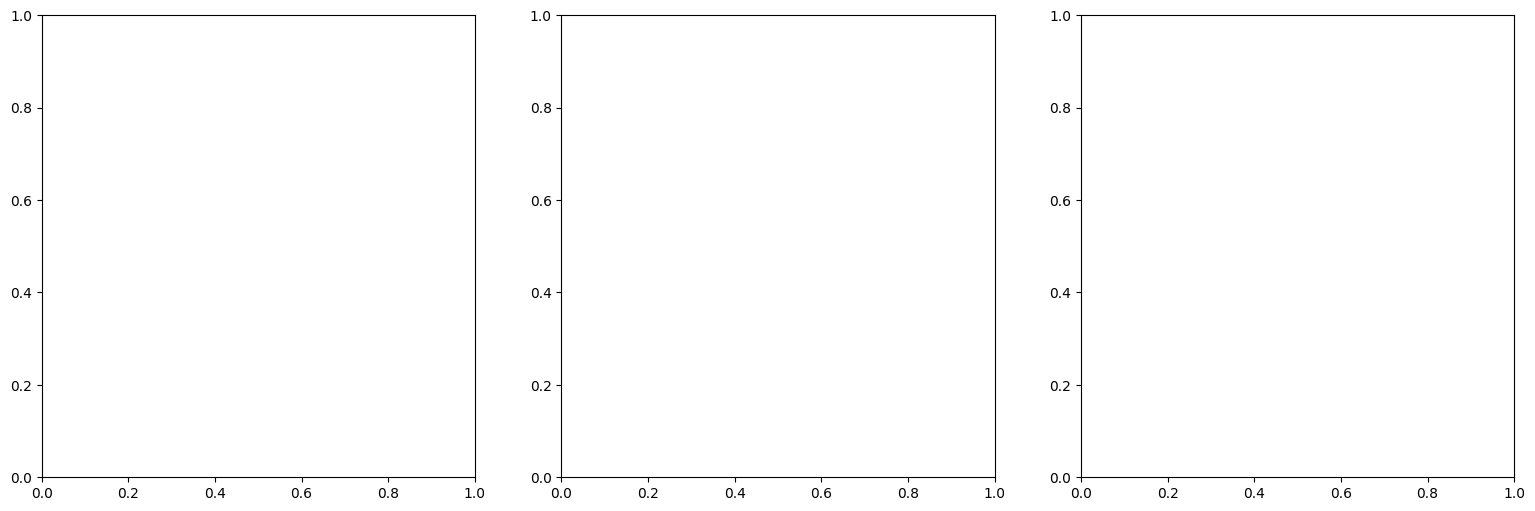

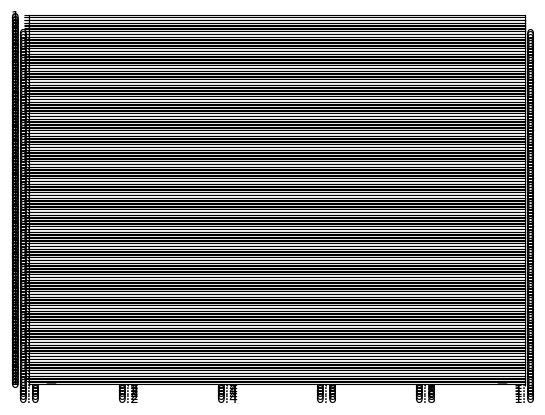

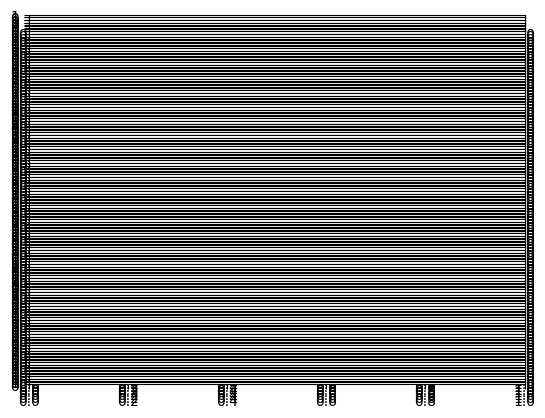

KeyboardInterrupt: 

In [10]:
""" online """

#hexagon = pcr.pclib.Hexagon()
gc_list = [
    pclib.GridLayer(25, 0.05, 0.9, "square", "square"),
    pclib.GridLayer(25, 0.2, 0.7, "square", "random_square"),
    pclib.GridLayer(25, 0.03, 0.9, "hexagon", "random_circle"),
]
gcn = pclib.GridNetwork(gc_list)
pcnn2d = pclib.PCNNgrid(N=30, Nj=len(gcn), gain=3., offset=1.,
                    clip_min=0.09,
                    threshold=0.07,
                    rep_threshold=0.1,
                    rec_threshold=0.1,
                    num_neighbors=8, trace_tau=0.1,
                    xfilter=gcn, name="2D")



a = []
#p = np.array([0.2, 0.2])
x, y = 0.2, 0.2
x0, y0 = 0.2, 0.2
traj = [[x, y]]
acc = np.zeros((len(gcn), 100))

size = 20
s = np.array([0.005, 0.005])
fig, (ax, ax1, ax2) = plt.subplots(1, 3, figsize=(19, 6))

for t in range(200_000):
    
    x += s[0]
    y += s[1]
    
    # hexagon boundaries & gc
    #x, y = hexagon(x, y)
    #acc[:, :-1] = acc[:, 1:]
    #acc[:, -1] = gcn([x - x0, y - y0]).flatten()
    #posj += [gch.get_positions()[4]]
    pcnn2d([x - x0, y - y0])

    x0 = x
    y0 = y

    
    if t % 20 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    # hit wall
    if x <= 0 or x >= size:
        s[0] *= -1
        x += s[0]
    elif y <= 0 or y >= size:
        s[1] *= -1
        y += s[1]

    traj += [[x, y]]
    if t % 10 == 0:
        clear_output(wait=True)
       

        plt.subplots(131)

        plt.scatter(*np.array(traj).T)
        plt.xticks(())
        plt.yticks(())

        plt.subplots(132)
        plt.subplots(133)
        plt.pause(0.001)



print("done")

---
## circuits

In [ ]:
def make_cir(N):

    da = pclib.BaseModulation(name="DA", size=N, min_v=0.1,
                              offset=0.01, gain=200.0)
    
    bnd = pclib.BaseModulation(name="BND", size=N, min_v=0.1,
                               offset=0.01, gain=200.0)
    
    cir = pclib.Circuits(da, bnd)
    logger(cir)
    return cir

cir = make_cir(4)
cir(np.array([0.]*4).astype(np.float32), 0., 0.)

2025-01-11 22:15:23 | Circuits


In [ ]:
             py::arg("threshold1"),
             py::arg("speed"),
             py::arg("wrec"),
             py::arg("modulator"),
             py::arg("max_depth") = 20,
             py::arg("threshold2") = 0.8f)


In [2]:
def gauss_dist(z, m, s):
    return np.exp(-((z-m)**2).sum(axis=1) / s)

class PCL:
    def __init__(self, n, s=1.0, bounds=[0, 1, 0, 1]):
        self.c = self._make_centers(n=n, bounds=bounds)
        self.s = s
        self.w = np.zeros((n**2, n**2))
        for i in range(n**2):
            self.w[i] = gauss_dist(self.c, self.c[i], 1)
        self.w *= 1 - np.eye(n**2)

    def _make_centers(self, n, bounds):
        # make centers over a 2D space as a lattice of n*n points
        x = np.linspace(bounds[0], bounds[1], n)
        y = np.linspace(bounds[2], bounds[3], n)
        xx, yy = np.meshgrid(x, y)
        
        # Combine the coordinates into a list of center points
        return np.column_stack((xx.ravel(), yy.ravel()))

    def __call__(self, x):
        return gauss_dist(self.c, x, self.s)


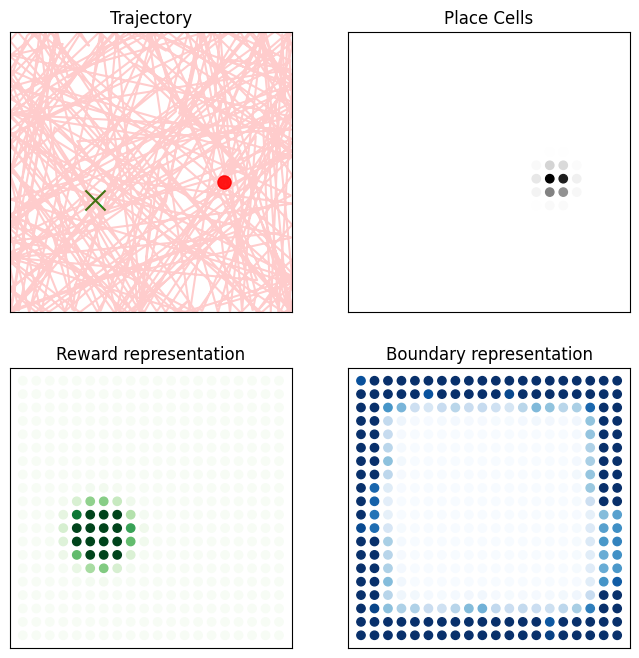

2025-01-12 02:21:38 | 


In [3]:
# ---
bounds = [0, 10, 0, 10]
speed = 1.
N = 20
pcl = PCL(n=N, s=0.3, bounds=bounds)

#cir = make_cir(N=N**2)
bnd = pclib.BaseModulation(name="BND", size=N**2, min_v=0.1,
                               offset=0.01, gain=200.0)
da = pclib.BaseModulation(name="DA", size=N**2, min_v=0.01, tau=2, lr=0.02,
                              offset=0., gain=1.0)
trgp = pclib.TargetProgram(0., speed, pcl.w, da)

# ---
s = np.array([1., 1.]) * speed
points = [[0.5, 0.5]]
x, y = points[0]
tot = 20000

activity = np.zeros((N**2, tot))

tra = []
color = "Greys"
collision = 0.
reward = 0.
rx, ry, rs = 3, 4, 0.5
delay = 0

plt.figure(figsize=(8, 8))
plt.subplot(111)
plt.pause(0.0001)


for t in range(tot):

    # update sim
    x += s[0]
    y += s[1]

    # collision
    if True:
        if x <= bounds[0] or x >= bounds[1]:
            s[0] *= -1
            x += s[0]
            #color = "Reds"
            delay = 10
            collision = 1.
        elif y <= bounds[2] or y >= bounds[3]:
            s[1] *= -1
            y += s[1]
            #color = "Oranges"
            delay = 10
            collision = 1.
        else:
            collision = 0.
            if delay == 0:
                color = "Greys"
            else:
                delay -= 1

    # reward
    rd = np.exp(-((x-rx)**2 + (y-ry)**2) / rs)
    reward = rd if rd > 0.1 else 0.
    
    # velocity
    if t % 200 == 0:
        s = np.random.uniform(-1, 1, 2)
        s = 0.1 * s / np.abs(s).sum()

    # record
    points += [[x, y]]

    # fwd
    activity[:, t] = pcl(points[-1])
    bnd(activity[:, t].astype(np.float32), collision)
    da(activity[:, t].astype(np.float32), reward)
    trgp.update(1.)
    trg_repr = trgp.get_trg_representation()

    # plot
    if t % 500 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 8))
        
        plt.subplot(221)
        plt.plot(*np.array(points).T, "r-", alpha=0.2)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=90)
        plt.scatter(rx, ry, alpha=0.9, color='green', s=210, marker="x")
        plt.xticks(())
        plt.yticks(())
        plt.title("Trajectory")

        plt.xlim(bounds[0], bounds[1])
        plt.ylim(bounds[2], bounds[3])

        plt.subplot(222)
        plt.scatter(*pcl.c.T, c=activity[:, t], cmap=color)
        plt.xticks(())
        plt.yticks(())
        plt.title("Place Cells")
        
        plt.subplot(223)
        plt.scatter(*pcl.c.T, c=da.get_weights(), cmap="Greens", vmax=1.)
        plt.xticks(())
        plt.yticks(())
        plt.title("Reward representation")

        plt.subplot(224)
        plt.scatter(*pcl.c.T, c=bnd.get_weights(), cmap="Blues", vmax=1.)
        plt.xticks(())
        plt.yticks(())
        plt.title("Boundary representation")

        plt.pause(0.0001)

logger()

In [2]:

# ---
bounds = [0, 10, 0, 10]
speed = 0.01
N = 200
#pcl = PCL(n=N, s=0.3, bounds=bounds)

# ---
da = pclib.BaseModulation(name="DA", size=N, min_v=0.01, lr=0.1,
                          offset=0.01, gain=50.0)
bnd = pclib.BaseModulation(name="BND", size=N, min_v=0.1, tau=1, lr=0.1,
                           offset=0.01, gain=50.0)
circuit = pclib.Circuits(da, bnd)

layershex = [
    pclib.GridHexLayer(0.03, 0.1),
    pclib.GridHexLayer(0.05, 0.9),
    pclib.GridHexLayer(0.04, 0.08),
    pclib.GridHexLayer(0.04, 0.05),
    pclib.GridHexLayer(0.03, 0.02),
    pclib.GridHexLayer(0.04, 0.01),
    pclib.GridHexLayer(0.02, 0.007),
]
xfilterhex = pclib.GridHexNetwork(layershex)
spacehex = pclib.PCNNgridhex(N, len(xfilter),
                          10, 1., 0.01, 0.1, 0.8, 0.1,
                          8, 0.1, xfilter, "2D")

gcn = pclib.GridNetwork([pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[-1, 0, -1, 0],
                          boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[0, 1, -1, 0],
               boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[-1, 0, 0, 1],
               boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[0, 1, 0, 1],
               boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[-1, 0, -1, 0],
                          boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[0, 1, -1, 0],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[-1, 0, 0, 1],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[0, 1, 0, 1],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1, 0, -1, 0],
                          boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[0, 1, -1, 0],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1, 0, 0, 1],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[0, 1, 0, 1],
                          boundary_type="square")])

space = pclib.PCNNgrid(N=N, Nj=len(gcn), gain=7., offset=1.1,
                       clip_min=0.01,
                       threshold=0.4,
                       rep_threshold=0.5,
                       rec_threshold=0.1,
                       num_neighbors=8, trace_tau=0.1,
                       xfilter=gcn, name="2D")


sampler = pclib.ActionSampling2D("default", 1)
wrec = space.get_wrec()
trgp = pclib.TargetProgram(0., wrec, da, 20, 0.)

brain = pclib.Brain(circuit, space, sampler, trgp)

# ---
s = [speed, speed]
points = [[0.5, 0.5]]
x, y = points[0]
tot = 50000

activity = np.zeros((N, tot))

tra = []
color = "Greys"
collision = 0.
reward = 0.
rx, ry, rs = 1, 1, 0.1
delay = 0

plt.figure(figsize=(8, 8))
plt.subplot(111)
plt.pause(0.0001)


for t in range(tot):

    # update sim
    x += s[0]
    y += s[1]

    # collision
    if True:
        if x <= bounds[0] or x >= bounds[1]:
            s[0] *= -1
            x += s[0]
            #color = "Reds"
            delay = 10
            collision = 1.
        elif y <= bounds[2] or y >= bounds[3]:
            s[1] *= -1
            y += s[1]
            #color = "Oranges"
            delay = 10
            collision = 1.
        else:
            collision = 0.
            if delay == 0:
                color = "Greys"
            else:
                delay -= 1

    # reward
    rd = np.exp(-((x-rx)**2 + (y-ry)**2) / rs)
    reward = rd if rd > 0.1 else 0.
    
    # velocity
    #if t % 200 == 0:
    #    s = np.random.uniform(-1, 1, 2)
    #    s = 0.1 * s / np.abs(s).sum()

    # record
    points += [[x, y]]

    # fwd
    #activity[:, t] = pcl(points[-1])
    s = brain(s, collision, reward, points[-1])
    activity[:, t] = brain.get_representation()
    

    # plot
    if t % 20 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 8))
        
        plt.subplot(221)
        plt.plot(*np.array(points).T, "r-", alpha=0.2)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=90)
        plt.scatter(rx, ry, alpha=0.9, color='green', s=210, marker="x")
        plt.xticks(())
        plt.yticks(())
        plt.title("Trajectory")

        plt.xlim(bounds[0], bounds[1])
        plt.ylim(bounds[2], bounds[3])

        plt.subplot(222)
        #plt.scatter(*space.get_centers(nonzero=False).T, cmap="Greys", alpha=0.5)
        #plt.scatter(*space.get_centers(nonzero=False).T, c=activity[:, t], cmap=color)
        plt.scatter(*space.get_centers(nonzero=False).T, c=brain.get_trg_representation(), cmap=color)
        
        tc = ((space.get_centers() * da.get_weights().reshape(-1, 1)) / da.get_weights().sum()).sum(axis=0)
        plt.scatter(tc[0], tc[1], s=200, c="green", marker="v")

        plt.xticks(())
        plt.yticks(())
        plt.title("Place Cells")
        
        plt.subplot(223)
        plt.scatter(*space.get_centers(nonzero=False).T, c=da.get_weights(), s=300*da.get_weights(), cmap="Greens")
        #plt.imshow(da.get_weights().reshape(1,-1), aspect="auto")
        plt.xticks(())
        plt.yticks(())
        plt.title("Reward representation")

        plt.subplot(224)
        plt.scatter(*space.get_centers(nonzero=False).T, c=bnd.get_weights(), s=300*bnd.get_weights(), cmap="Blues")
        plt.xticks(())
        plt.yticks(())
        plt.title("Boundary representation")

        plt.pause(0.0001)

logger()

[+] LeakyVariable1D created with name: DA
[+] LeakyVariable1D created with name: BND


NameError: name 'xfilter' is not defined

## pre-final

---

In [2]:
""" settings """

SPEED = 1.
BOUNDS = [0., 10, 0., 10.]
N = 50

""" initialization """
gcn = pclib.GridNetwork([pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[-1, 0, -1, 0],
                          boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[0, 1, -1, 0],
               boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[-1, 0, 0, 1],
               boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.1, init_bounds=[0, 1, 0, 1],
               boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[-1, 0, -1, 0],
                          boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[0, 1, -1, 0],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[-1, 0, 0, 1],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.05, init_bounds=[0, 1, 0, 1],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1, 0, -1, 0],
                          boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[0, 1, -1, 0],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[-1, 0, 0, 1],
              boundary_type="square"),
           pclib.GridLayer(N=9, sigma=0.04, speed=0.025, init_bounds=[0, 1, 0, 1],
                          boundary_type="square")])

space = pclib.PCNNgrid(N=N, Nj=len(gcn), gain=7., offset=1.1,
                       clip_min=0.01,
                       threshold=0.4,
                       rep_threshold=0.5,
                       rec_threshold=0.1,
                       num_neighbors=8, trace_tau=0.1,
                       xfilter=gcn, name="2D")

da = pclib.BaseModulation(name="DA", size=N, min_v=0.01, lr=0.1,
                          offset=0.01, gain=50.0)
bnd = pclib.BaseModulation(name="BND", size=N, min_v=0.01,
                           tau=1, lr=0.2, offset=0.01,
                           gain=50.0)
circuit = pclib.Circuits(da, bnd)

wrec = space.get_wrec()
trgp = pclib.TargetProgram(0., wrec,
                           da, 20, 0.)

eval_net = pclib.OneLayerNetwork([0.1, 0.1, 0.1, 0.1])
expmd = pclib.ExperienceModule(SPEED,
                               circuit,
                               trgp, space, eval_net)

brain = pclib.Brain(circuit, space, trgp, expmd)


# ---
s = [SPEED, SPEED]
points = [[0.5, 0.5]]
x, y = points[0]
tot = 50000

activity = np.zeros((N, tot))

tra = []
color = "Greys"
collision = 0.
reward = 0.
rx, ry, rs = 1, 1, 0.1
delay = 0

plt.figure(figsize=(8, 8))
plt.subplot(111)
plt.pause(0.0001)


for t in range(tot):

    # update sim
    x += s[0]
    y += s[1]

    # collision
    if True:
        if x <= BOUNDS[0] or x >= BOUNDS[1]:
            s[0] *= -1
            x += s[0]
            #color = "Reds"
            delay = 10
            collision = 1.
        elif y <= BOUNDS[2] or y >= BOUNDS[3]:
            s[1] *= -1
            y += s[1]
            #color = "Oranges"
            delay = 10
            collision = 1.
        else:
            collision = 0.
            if delay == 0:
                color = "Greys"
            else:
                delay -= 1

    # reward
    rd = np.exp(-((x-rx)**2 + (y-ry)**2) / rs)
    reward = rd if rd > 0.1 else 0.
    
    # velocity
    #if t % 200 == 0:
    #    s = np.random.uniform(-1, 1, 2)
    #    s = 0.1 * s / np.abs(s).sum()

    # record
    points += [[x, y]]

    # fwd
    #activity[:, t] = pcl(points[-1])
    s = brain(s, collision, reward, points[-1])
    activity[:, t] = brain.get_representation()
    

    # plot
    if t % 20 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 8))
        
        plt.subplot(221)
        plt.plot(*np.array(points).T, "r-", alpha=0.2)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=90)
        plt.scatter(rx, ry, alpha=0.9, color='green', s=210, marker="x")
        plt.xticks(())
        plt.yticks(())
        plt.title("Trajectory")

        plt.xlim(BOUNDS[0], BOUNDS[1])
        plt.ylim(BOUNDS[2], BOUNDS[3])

        plt.subplot(222)
        #plt.scatter(*space.get_centers(nonzero=False).T, cmap="Greys", alpha=0.5)
        #plt.scatter(*space.get_centers(nonzero=False).T, c=activity[:, t], cmap=color)
        plt.scatter(*space.get_centers(nonzero=False).T, c=brain.get_trg_representation(), cmap=color)
        
        tc = ((space.get_centers() * da.get_weights().reshape(-1, 1)) / da.get_weights().sum()).sum(axis=0)
        plt.scatter(tc[0], tc[1], s=200, c="green", marker="v")

        plt.xticks(())
        plt.yticks(())
        plt.title("Place Cells")
        
        plt.subplot(223)
        plt.scatter(*space.get_centers(nonzero=False).T, c=da.get_weights(), s=300*da.get_weights(), cmap="Greens")
        #plt.imshow(da.get_weights().reshape(1,-1), aspect="auto")
        plt.xticks(())
        plt.yticks(())
        plt.title("Reward representation")

        plt.subplot(224)
        plt.scatter(*space.get_centers(nonzero=False).T, c=bnd.get_weights(), s=300*bnd.get_weights(), cmap="Blues")
        plt.xticks(())
        plt.yticks(())
        plt.title("Boundary representation")

        plt.pause(0.0001)

logger()

[+] GridNetwork created
[-] GridNetwork destroyed
[-] GridNetwork destroyed
[+] LeakyVariable1D created with name: DA
[+] LeakyVariable1D created with name: BND
[+] TargetProgram created


TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. core.build.pclib.ExperienceModule(speed: float, circuits: core.build.pclib.Circuits, trgp: core.build.pclib.TargetProgram, space: core.build.pclib.PCNNsq, eval_network: OneLayerNetwork, max_depth: int = 10, action_delay: float = 1.0)

Invoked with: 1.0, Circuits, TargetProgram, PCNN(2D501087.0000001.1000000.10000080.100000), <core.build.pclib.OneLayerNetwork object at 0x116468ef0>

---
## study GC

In [43]:
def make_points(tot=10_000, size=100, speed=0.15):
    points = [[0., 0.]]
    s = np.array([speed, speed])
    x, y = points[0]
    old_point = points[0]
    
    for t in range(tot):
        
        x += s[0]
        y += s[1]
    
        # hit wall
        if x <= 0 or x >= size:
            s[0] *= -1
            x += s[0]
        elif y <= 0 or y >= size:
            s[1] *= -1
            y += s[1]
    
        points += [[x, y]]
        if t % 500 == 0:
            s = np.random.uniform(-1, 1, 2)
            s = 0.1 * s / np.abs(s).sum()
        
        old_point = points[-1]
        points += [[x, y]]
        
    return points


def run_points(points, gc):
    activity = np.zeros((len(gc), len(points)))
    p0 = points[0]
    for t, p in enumerate(points):
        activity[:, t] = gc([p[0]-p0[0], p[1]-p0[1]])
        p0 = p
    return activity


def run(gc, tot=10_000, size=100, speed=0.15, plot=False):
    
    # random walk
    points = [[0., 0.]]
    s = np.array([speed, speed])
    x, y = points[0]
    old_point = points[0]
    
    # record
    activity = np.zeros((len(gc), tot))
    
    for t in range(tot):
        
        x += s[0]
        y += s[1]
    
        # hit wall
        if x <= 0 or x >= size:
            s[0] *= -1
            x += s[0]
        elif y <= 0 or y >= size:
            s[1] *= -1
            y += s[1]
    
        points += [[x, y]]
        if t % 500 == 0:
            s = np.random.uniform(-1, 1, 2)
            s = 0.1 * s / np.abs(s).sum()
    
        activity[:, t] = gc([points[-1][0]-old_point[0],
                             points[-1][1]-old_point[1]])
        
        old_point = points[-1]
    
        if t % 20 == 0 and plot:
            clear_output(wait=True)
            plt.figure(figsize=(8, 4))
            plt.subplot(121)
            plt.scatter(*np.array(gc.get_positions()).T, s=50)
            plt.xlim((-1.1, 1.1))
            plt.ylim((-1.1, 1.1))
            plt.title(f"t={t}s {np.around(s, 4)} [{x:.3f}, {y:.3f}]")
            
            plt.subplot(122)
            plt.imshow(activity[:, t-500:t], cmap="plasma", aspect="auto")
            #plt.plot(range(len(activity)), len(activity) - activity*10, '-', color="white", lw=2)
            plt.axis('off')
            plt.pause(0.001)

    return activity

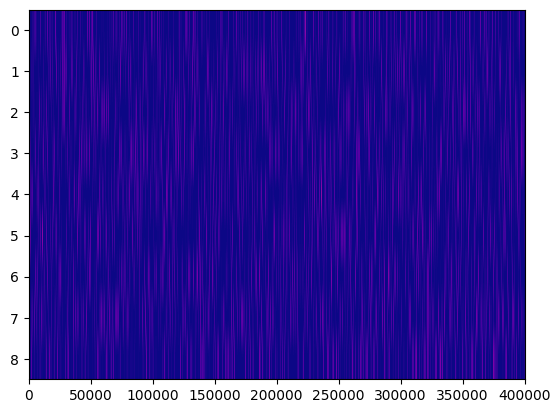

In [45]:
gc = pclib.GridLayerSq(sigma=0.04, speed=0.5, bounds=[-1., 1., -1, 1])
gc2 = pclib.GridLayerSq(sigma=0.04, speed=0.2, bounds=[-1., 1., -1, 1])
gc3 = pclib.GridLayerSq(sigma=0.5, speed=0.1, bounds=[-1., 1., -1, 1])

#gc = pclib.GridHexLayer(sigma=0.04, speed=0.05)
#gc2 = pclib.GridHexLayer(sigma=0.04, speed=0.2)
#gc3 = pclib.GridHexLayer(sigma=0.05, speed=0.1)


points = make_points(200_000)
a = run_points(points, gc)
a2 = run_points(points, gc2)
a3 = run_points(points, gc3)


plt.imshow(a2, cmap="plasma", aspect="auto");

In [44]:
len(gc)

25

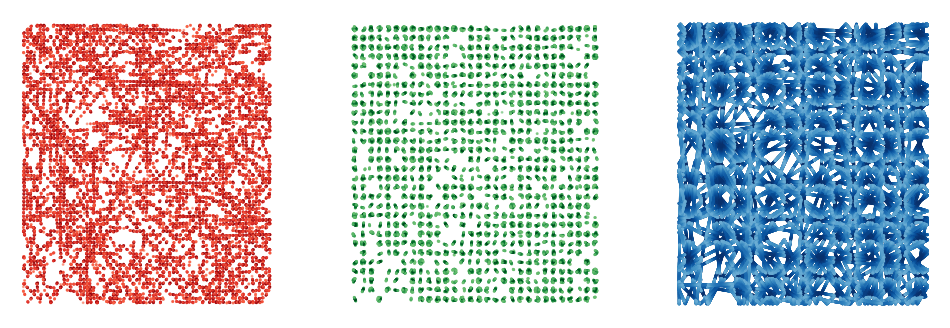

In [50]:
colors = ("Reds", "Greens", "Blues")
plt.figure(figsize=(12, 4))
for i, ai in enumerate((a, a2, a3)):
    plt.subplot(1, 3, i+1)
    for j in range(0, 9):
        plt.scatter(*np.array(points).T, c=ai[j], cmap=colors[i], s=(ai[j]*2).astype(int), alpha=0.3)
    plt.axis('off')

plt.show()

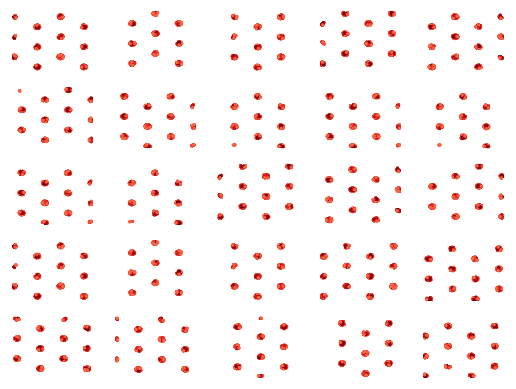

In [45]:
for i in range(len(gc)):
    plt.subplot(int(np.sqrt(len(gc))), int(np.sqrt(len(gc))), i+1)
    plt.scatter(*np.array(points).T, c=a[i], cmap="Reds", s=(a[i]*2).astype(int), alpha=0.3)
    plt.axis('off')

plt.show()

In [17]:
for i in range(len(gc)):
    plt.subplot(int(np.sqrt(len(gc))), int(np.sqrt(len(gc))), i+1)
    plt.scatter(*np.array(points).T, c=a2[i], cmap="Greens", s=(a2[i]*2).astype(int), alpha=0.3)
    plt.axis('off')

plt.show()

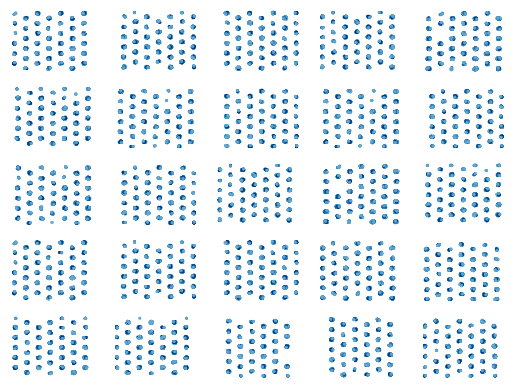

In [50]:
for i in range(len(gc)):
    plt.subplot(int(np.sqrt(len(gc))), int(np.sqrt(len(gc))), i+1)
    plt.scatter(*np.array(points).T, c=a3[i], cmap="Blues", s=(a3[i]*2).astype(int), alpha=0.3)
    plt.axis('off')

plt.show()

In [13]:
gc = pclib.GridLayerSq(sigma=0.04, speed=0.5, bounds=[-1., 1.])
a = run(gc, 10_000)
plt.imshow(a, cmap="plasma", aspect="auto");

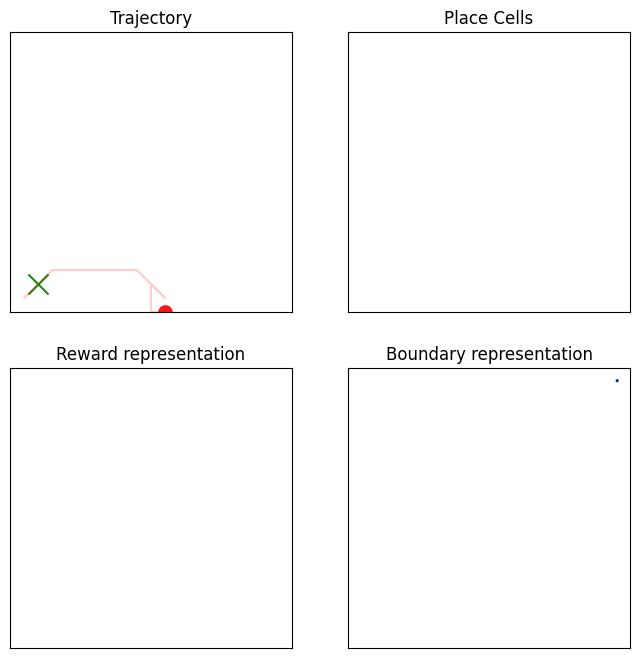

KeyboardInterrupt: 

In [7]:
""" settings """

SPEED = 1.
BOUNDS = [0., 10, 0., 10.]
N = 50

""" initialization """
gcn = pclib.GridNetworkSq([pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1., 1.-1/6, -1., 1.]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1+1/6., 1., -1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1., 1.-1/6, -1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1.+1/6, 1., -1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1., 1.-1/6, -1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1.+1/6, 1., -1., 1.-1/6]),])

space = pclib.PCNNsq(N=N, Nj=len(gcn), gain=7., offset=1.1,
                       clip_min=0.01,
                       threshold=0.4,
                       rep_threshold=0.5,
                       rec_threshold=0.1,
                       num_neighbors=8, trace_tau=0.1,
                       xfilter=gcn, name="2D")

da = pclib.BaseModulation(name="DA", size=N, min_v=0.01, lr=0.1,
                          offset=0.01, gain=50.0)
bnd = pclib.BaseModulation(name="BND", size=N, min_v=0.01,
                           tau=1, lr=0.2, offset=0.01,
                           gain=50.0)
circuit = pclib.Circuits(da, bnd)

wrec = space.get_wrec()
trgp = pclib.TargetProgram(0., wrec,
                           da, 20, 0.)

eval_net = pclib.OneLayerNetwork([-0.5, 1., -0.1, 1.])
expmd = pclib.ExperienceModule(SPEED,
                               circuit,
                               trgp, space, eval_net)

brain = pclib.Brain(circuit, space, trgp, expmd)


# ---
s = [SPEED, SPEED]
points = [[0.5, 0.5]]
x, y = points[0]
tot = 50000

activity = np.zeros((N, tot))

tra = []
color = "Greys"
collision = 0.
reward = 0.
rx, ry, rs = 1, 1, 0.1
delay = 0

plt.figure(figsize=(8, 8))
plt.subplot(111)
plt.pause(0.0001)


for t in range(tot):

    # update sim
    x += s[0]
    y += s[1]

    # collision
    if True:
        if x <= BOUNDS[0] or x >= BOUNDS[1]:
            s[0] *= -1
            x += s[0]
            #color = "Reds"
            delay = 10
            collision = 1.
        elif y <= BOUNDS[2] or y >= BOUNDS[3]:
            s[1] *= -1
            y += s[1]
            #color = "Oranges"
            delay = 10
            collision = 1.
        else:
            collision = 0.
            if delay == 0:
                color = "Greys"
            else:
                delay -= 1

    # reward
    rd = np.exp(-((x-rx)**2 + (y-ry)**2) / rs)
    reward = rd if rd > 0.1 else 0.
    
    # velocity
    #if t % 200 == 0:
    #    s = np.random.uniform(-1, 1, 2)
    #    s = 0.1 * s / np.abs(s).sum()

    # record
    points += [[x, y]]

    # fwd
    #activity[:, t] = pcl(points[-1])
    s = brain(s, collision, reward, points[-1])
    activity[:, t] = brain.get_representation()
    

    # plot
    if t % 2000 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(8, 8))
        
        plt.subplot(221)
        plt.plot(*np.array(points).T, "r-", alpha=0.2)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=90)
        plt.scatter(rx, ry, alpha=0.9, color='green', s=210, marker="x")
        plt.xticks(())
        plt.yticks(())
        plt.title("Trajectory")

        plt.xlim(BOUNDS[0], BOUNDS[1])
        plt.ylim(BOUNDS[2], BOUNDS[3])

        plt.subplot(222)
        #plt.scatter(*space.get_centers(nonzero=False).T, cmap="Greys", alpha=0.5)
        #plt.scatter(*space.get_centers(nonzero=False).T, c=activity[:, t], cmap=color)
        plt.scatter(*space.get_centers(nonzero=False).T, c=brain.get_trg_representation(), cmap=color)
        
        tc = ((space.get_centers() * da.get_weights().reshape(-1, 1)) / da.get_weights().sum()).sum(axis=0)
        plt.scatter(tc[0], tc[1], s=200, c="green", marker="v")

        plt.xticks(())
        plt.yticks(())
        plt.title("Place Cells")
        
        plt.subplot(223)
        plt.scatter(*space.get_centers(nonzero=False).T, c=da.get_weights(), s=300*da.get_weights(), cmap="Greens")
        #plt.imshow(da.get_weights().reshape(1,-1), aspect="auto")
        plt.xticks(())
        plt.yticks(())
        plt.title("Reward representation")

        plt.subplot(224)
        plt.scatter(*space.get_centers(nonzero=False).T, c=bnd.get_weights(), s=300*bnd.get_weights(), cmap="Blues")
        plt.xticks(())
        plt.yticks(())
        plt.title("Boundary representation")

        plt.pause(0.0001)

logger()

---

In [4]:
gcn = pclib.GridNetworkSq([pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1+1/6., 1.]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1.+1/6, 1.]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1.+1/6, 1.])])
pc = pclib.PCNNbase(8, len(gcn), 10, 0.1, 0.01, 0.7, 0.1, 0.1, 10, 0.1, gcn, "pcnn")

[+] GridNetwork created
[-] GridNetworkSq destroyed


In [8]:
N = 150
SPEED = 0.01
gcn = pclib.GridNetworkSq([pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1+1/6., 1.]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1.+1/6, 1.]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1., 1.-1/6]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1.+1/6, 1.]),])

space = pclib.PCNNsq(N=N, Nj=len(gcn), gain=7., offset=1.1,
                       clip_min=0.01,
                       threshold=0.4,
                       rep_threshold=0.5,
                       rec_threshold=0.1,
                       num_neighbors=8, trace_tau=0.1,
                       xfilter=gcn, name="2D")

da = pclib.BaseModulation(name="DA", size=N, min_v=0.01, lr=0.1,
                          offset=0.01, gain=50.0)
bnd = pclib.BaseModulation(name="BND", size=N, min_v=0.01,
                           tau=1, lr=0.2, offset=0.01,
                           gain=50.0)
circuit = pclib.Circuits(da, bnd)

wrec = space.get_wrec()
trgp = pclib.TargetProgram(0., wrec,
                           da, 20, 0.)

eval_net = pclib.OneLayerNetwork([-0.5, 1., -0.1, 1.])
expmd = pclib.ExperienceModule(SPEED,
                               circuit,
                               trgp, space, eval_net)

brain = pclib.Brain(circuit, space, trgp, expmd)

TypeError: __init__(): incompatible constructor arguments. The following argument types are supported:
    1. core.build.pclib.GridLayerSq(sigma: float, speed: float, bounds: Annotated[list[float], FixedSize(4)] = [0.0, 1.0, 0.0, 1.0])

Invoked with: kwargs: sigma=0.04, speed=0.1, bounds=[-1.0, 0.8333333333333334]

## checking pcnn base

In [3]:
gcn = pclib.GridNetworkSq([pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1., 1.-1/6])])
pc = pclib.PCNNbase(N=100, Nj=len(gcn), xfilter=gcn, length=20)

[+] GridNetwork created
[-] GridNetworkSq destroyed
[-] GridNetworkSq destroyed


In [4]:
plt.scatter(*pc.get_basis().T);

[+] GridNetwork created
[-] GridNetworkSq destroyed


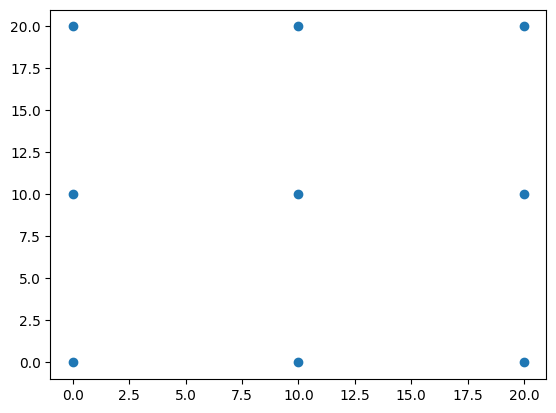

In [2]:
gcn = pclib.GridNetworkSq([pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1., 1.-1/6])])
space = pclib.PCNNbase(N=9, Nj=len(gcn), xfilter=gcn, length=20)
plt.scatter(*space.get_basis().T);

In [5]:
""" initialization """
""" settings """

SPEED = 0.6
BOUNDS = [0., 10]
N = 400
gcn = pclib.GridNetworkSq([pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1., 1.-1/6])])
space = pclib.PCNNbase(N, len(gcn), 20, 0.9, 0.1, 0.7, 0.1, 0.1, 10, 0.1, gcn, BOUNDS[-1], "pcnn")

da = pclib.BaseModulation(name="DA", size=N, min_v=0.1, lr=0.1, tau=1, clip=0.05,
                          offset=0.1, gain=50.0)
bnd = pclib.BaseModulation(name="BND", size=N, min_v=0.9, clip=0.1,
                           tau=1, lr=0.2, offset=0.9,
                           gain=50.0)
circuit = pclib.Circuits(da, bnd)

wrec = space.get_wrec()
trgp = pclib.TargetProgram(0., wrec,
                           da, 20, 0.)

eval_net = pclib.OneLayerNetwork([0., 1., 1., 0.])
expmd = pclib.ExperienceModule(speed=SPEED,
                               circuits=circuit,
                               trgp=trgp, space=space, eval_network=eval_net,
                               max_depth=10, action_delay=1.0)

brain = pclib.Brain(circuit, space, trgp, expmd)

[+] GridNetwork created
[-] GridNetworkSq destroyed
[-] GridNetworkSq destroyed
[-] PCNN destroyed
[-] GridNetworkSq destroyed
[+] LeakyVariable1D created with name: DA
[-] LeakyVariable1D destroyed with name: DA
[+] LeakyVariable1D created with name: BND
[-] LeakyVariable1D destroyed with name: BND
[+] TargetProgram created
[-] TargetProgram destroyed
Action Speed : 0.600000
Action Speed : 0.600000


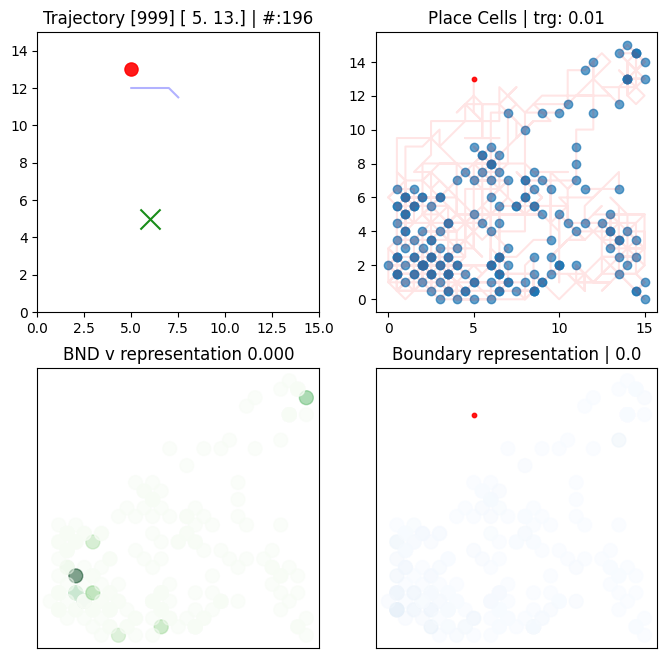

2025-01-20 17:28:40 | 


In [20]:
""" settings """

SPEED = 0.5
BOUNDS = [0., 15]
N = 14**2

""" initialization """
if 0:
    space = pclib.PCNNbase(N, 0, 20, 0.9, 0.1, 0.7, 0.3, 3., 10, BOUNDS[-1], "pcnn")
elif 1:
    gcn = pclib.GridNetworkSq([
           pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1, 1, -1, 1]),
           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1, 1, -1, 1]),
           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1, 1, -1, 1]),
           pclib.GridLayerSq(sigma=0.04, speed=0.005, bounds=[-1, 1, -1, 1])])
    
    space = pclib.PCNNsq(N=N, Nj=len(gcn), gain=7., offset=1.1,
                   clip_min=0.01,
                   threshold=0.4,
                   rep_threshold=0.4,
                   rec_threshold=0.1,
                   num_neighbors=8, trace_tau=0.1,
                   xfilter=gcn, name="2D")
else:
    gcn = pclib.GridHexNetwork([
                pclib.GridHexLayer(sigma=0.03, speed=0.1),
                pclib.GridHexLayer(sigma=0.05, speed=0.09),
                pclib.GridHexLayer(sigma=0.04, speed=0.08),
                pclib.GridHexLayer(sigma=0.03, speed=0.07),
                pclib.GridHexLayer(sigma=0.04, speed=0.06)])
    
    space = pclib.PCNNgridhex(N=200,
                              Nj=len(gcn),
                              gain=10.,
                              offset=1.5,
                              clip_min=0.01,
                              threshold=0.1,
                              rep_threshold=0.2,
                              rec_threshold=3,
                              num_neighbors=8, trace_tau=0.1,
                              xfilter=gcn, name="2D")


#
pcnn2d = smc.PCNNplotter(space, 100000)


da = pclib.BaseModulation(name="DA", size=N, min_v=0., lr=0.1, tau=1, clip=0.05,
                          offset=0.5, gain=50.0)
bnd = pclib.BaseModulation(name="BND", size=N, min_v=0., clip=0.1,
                           tau=1, lr=0.99, offset=0.5,
                           gain=50.0)
circuit = pclib.Circuits(da, bnd)

trgp = pclib.TargetProgram(0., space.get_wrec(), space.get_wff(),
                           da, 20, 0.)

eval_net = pclib.OneLayerNetwork([-1., 1., 0., 1.])
expmd = pclib.ExperienceModule(speed=SPEED,
                               circuits=circuit,
                               trgp=trgp, space=space, eval_network=eval_net,
                               max_depth=3, action_delay=2.0)

brain = pclib.Brain(circuit, space, trgp, expmd)

plan_ = []

# ---
s = [SPEED, SPEED]
points = [[0.5, 0.5]]
#space.set_xfilter(points[0])
x, y = points[0]
tot = 1000

activity = np.zeros((N, tot))
var1 = [0.]

tra = []
color = "Greys"
collision = 0.
reward = 0.
rx, ry, rs = 6, 5, 0.1
delay = 0

pref = points[0]

plt.figure(figsize=(8, 8))
plt.subplot(111)
plt.pause(0.0001)


for t in range(tot):

    # update sim
    x += s[0]
    y += s[1]

    # collision
    if x <= BOUNDS[0] or x >= BOUNDS[1]:

        s[0] *= -1
        x += s[0]*2.
        #color = "Reds"
        delay = 10
        collision = 1.
    elif y <= BOUNDS[0] or y >= BOUNDS[1]:
        s[1] *= -1
        y += s[1]*2.
        #color = "Oranges"
        delay = 10
        collision = 1.
    else:
        collision = 0.
        if delay == 0:
            color = "Greys"
        else:
            delay -= 1

    # reward
    rd = np.exp(-((x-rx)**2 + (y-ry)**2) / rs)
    reward = rd if rd > 0.1 else 0.
    
    # velocity
    #if t % 200 == 0:
    #    s = np.random.uniform(-1, 1, 2)
    #    s = 0.1 * s / np.abs(s).sum()

    # record
    points += [[x, y]]
    
    if expmd.new_plan:
        pref = points[-1]

    # fwd
    #activity[:, t] = pcl(points[-1])
    s = brain(s, collision, reward, points[-1])
    activity[:, t] = brain.get_representation()
    var1 += [collision]
    pcnn2d(brain.get_representation(), np.array([x, y]))

    # plot
    if t % 9 == 0:

        #input()

        #pcnn2d.render()

        plan_ = [pref]
        for a in expmd.get_plan()[0][1:]:
            plan_ += [[plan_[-1][0]+a[0], plan_[-1][1]+a[1]]]

        #input()
        clear_output(wait=True)
        
        #print(expmd.get_plan()[1], expmd.get_plan()[2])
        
        plt.figure(figsize=(8, 8))
        
        plt.subplot(221)
        #plt.scatter(*np.array(points)[2:].T, c=activity[:, :t].sum(axis=0), cmap='plasma', s=90, vmin=0., vmax=0.1, alpha=0.9)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=90)
        plt.scatter(rx, ry, alpha=0.9, color='green', s=210, marker="x")
        plt.plot(*np.array(plan_).T, "b-", alpha=0.3)
        #plt.xticks(())
        #plt.yticks(())
        plt.title(f"Trajectory [{t}] {np.around(points[-1], 2)} | #:{len(space)}")

        plt.xlim(BOUNDS[0], BOUNDS[1])
        plt.ylim(BOUNDS[0], BOUNDS[1])

        plt.subplot(222)
        #plt.scatter(*space.get_centers(nonzero=False).T, cmap="Greys", alpha=0.5)
        #plt.scatter(*space.get_centers(nonzero=False).T, c=activity[:, t], cmap=color)
        plt.plot(*np.array(points).T, "r-", alpha=0.1)
        plt.scatter(*space.get_centers().T, cmap=color, alpha=0.7)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=10)
        
        #tc = ((space.get_basis() * da.get_weights().reshape(-1, 1)) / da.get_weights().sum()).sum(axis=0)
        #plt.scatter(tc[0], tc[1], s=200, c="green", marker="v")

        #plt.xticks(())
        #plt.yticks(())
        plt.title(f"Place Cells | trg: {trgp.get_trg_representation().sum():.2f}")
        
        plt.subplot(223)
        plt.scatter(*space.get_centers().T, c=da.get_weights(), s=100+0*da.get_weights(), cmap="Greens", alpha=0.5)
        #plt.imshow(da.get_weights().reshape(1,-1), aspect="auto")
        #plt.bar(range(1), bnd.get_leaky_v())
        #plt.imshow(activity[:, max(0, t-20):t], cmap="viridis", aspect="auto")
        #plt.ylim((0, 1.1))
        #plt.imshow(space.get_wff(), aspect="auto", vmin=0.)
        plt.xticks(())
        plt.yticks(())
        plt.title(f"BND v representation {bnd.get_leaky_v():.3f}")

        plt.subplot(224)
        #plt.scatter(*np.array(points).T, c=var1, alpha=1., cmap="Reds", s=50)
        plt.scatter(*space.get_centers().T, c=bnd.get_weights(),#*brain.get_representation(),
                    s=100+0*bnd.get_weights()+0*brain.get_representation(), cmap="Blues", alpha=0.5, vmin=0., vmax=1.)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=10)
        plt.xticks(())
        plt.yticks(())
        plt.title(f"Boundary representation | {collision}")
        

        plt.pause(0.0001)

plt.show()
logger()




In [21]:
da.get_weights()

array([0.        , 0.00341756, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0043988 , 0.        , 0.        ,
       0.00100075, 0.00540378, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00176509, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00196441, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
aseq, vseq, sseq, depth = expmd.get_plan()
vseq

[[-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0]]

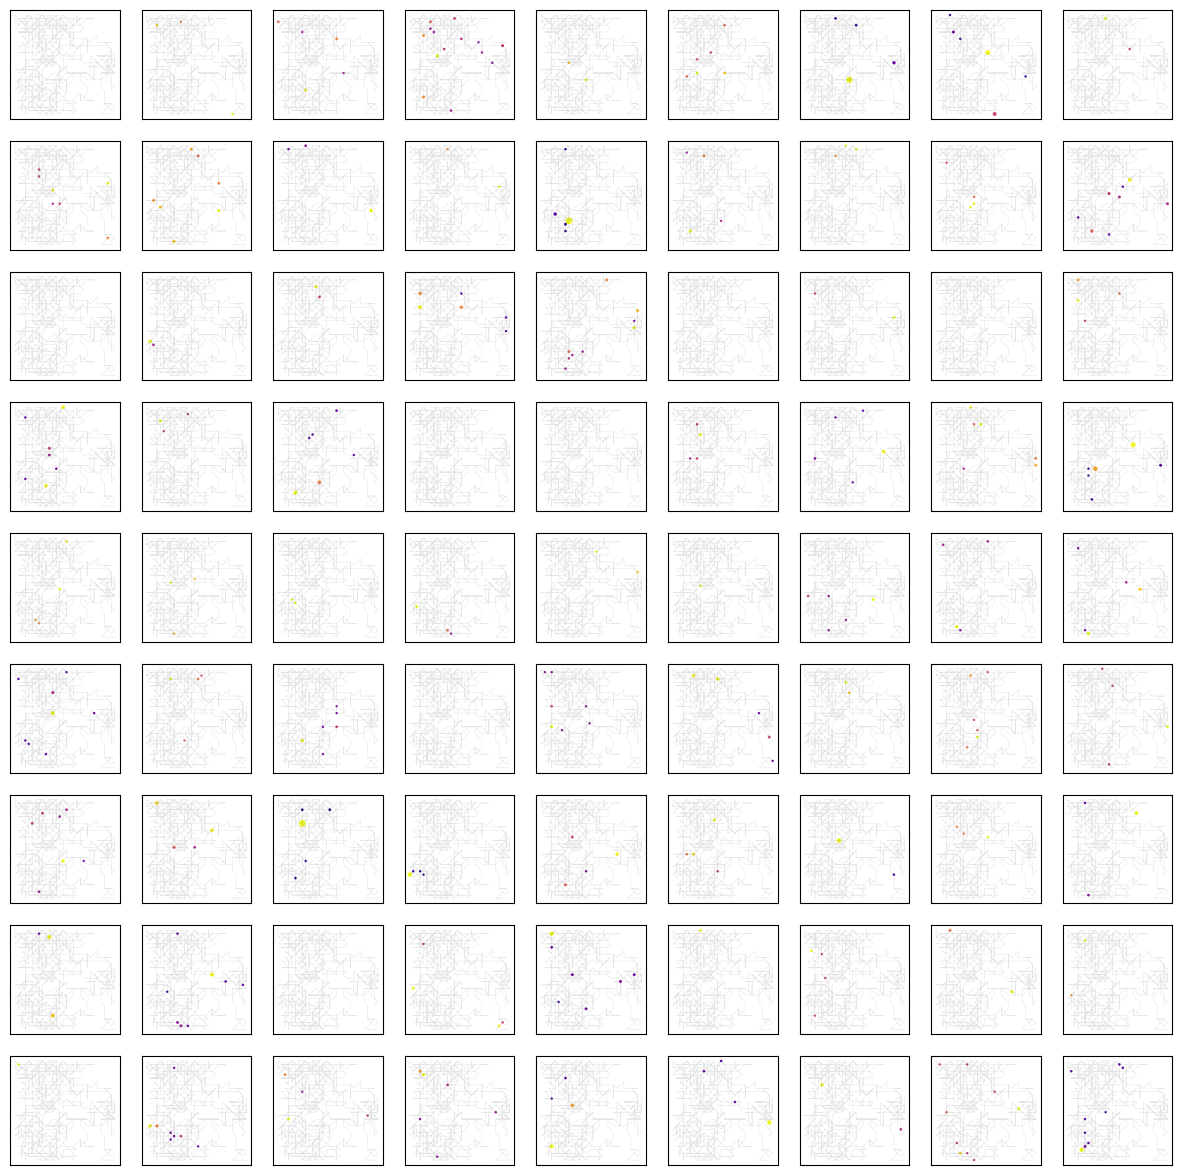

In [6]:
traj = np.array(pcnn2d.trajectory)
record = np.array(pcnn2d.record_pcnn)

centers = pcnn2d.pcnn2D.get_centers()

plt.figure(figsize=(15, 15))
for i, ax in enumerate(pcnn2d.axs):

    plt.subplot(9, 9, i+1)

    plt.plot(traj[:, 0], traj[:, 1],
            "k", alpha=0.1, lw=0.4)
    plt.scatter(traj[:, 0], traj[:, 1],
               c=record[:, i], cmap="plasma",
               s=50*record[:, i],
               alpha=0.9)

    #plt.scatter(centers[i, 0], centers[i, 1],
    #           c="k", s=15)
    #plt.axis("off")
    #plt.title(f"{np.sum(record[-1, i]):.3f}")
    #plt.xlim(0, 20)
    #plt.ylim(0, 20)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

#### .

In [13]:
plt.plot(range(N), bnd.get_weights());

In [10]:
aseq, vseq, sseq, depth = expmd.get_plan()
vseq

[[-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0]]

In [7]:
space = pclib.PCNNbase(N, len(gcn), 20, 0.9, 0.1, 0.7, 0.3, 3., 10, 0.1, gcn, BOUNDS[-1], "pcnn")

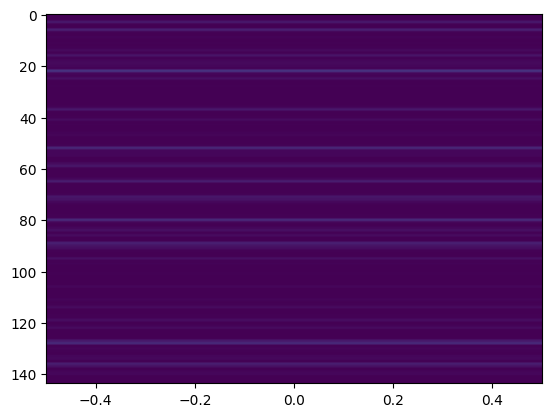

In [29]:
plt.imshow((space.get_wff().T @ da.get_weights().reshape(-1, 1)).reshape(-1, 1), aspect="auto", vmin=0, vmax=0.05);

In [9]:
trgp.evaluate(trgp.get_trg_representation())

0.0

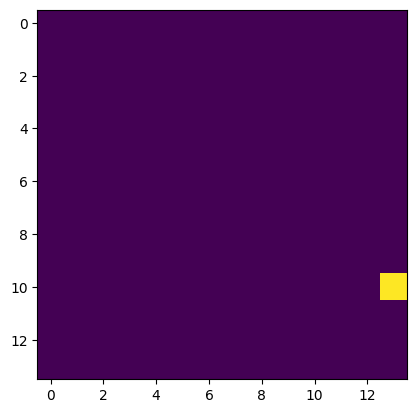

In [8]:
trgp.update(1.0)
plt.imshow(trgp.get_trg_representation().reshape(14, 14));

In [4]:
plt.imshow(space.get_wrec());

In [23]:
space.get_wrec().sum()

1712.333

In [14]:
expmd.get_actions()

[[-0.09998490661382675, 0.09998490661382675],
 [0.0, 0.20000000298023224],
 [0.09998490661382675, 0.09998490661382675],
 [-0.20000000298023224, 0.0],
 [0.20000000298023224, 0.0],
 [-0.09998490661382675, -0.09998490661382675],
 [0.0, -0.20000000298023224],
 [0.09998490661382675, -0.09998490661382675]]

In [8]:
u, _ = space([4., 4.])
plt.scatter(*space.get_basis().T, c=u.flatten(), cmap="Greys");

In [18]:
help(utc.generalized_sigmoid)

Help on CPUDispatcher in module utils_core:

generalized_sigmoid(x: numpy.ndarray, alpha: float, beta: float, clip_min: float = 0.0, gamma: float = 1.0) -> numpy.ndarray
    generalized sigmoid function and set values below
    a certain threshold to zero.
    
    Parameters
    ----------
    x : np.ndarray
        the input
    alpha : float
        the threshold
    beta : float
        the slope
    gamma : float
        the intensity (height).
        Default is 1.
    clip_min : float
        the minimum value to clip.
        Default is 0.
    
    Returns
    -------
    np.ndarray
        The output array.



In [62]:
(space.get_wrec() / space.get_wrec().sum(axis=1))

array([[0.        , 0.02377387, 0.03792689, ..., 0.        , 0.        ,
        0.        ],
       [0.02919671, 0.        , 0.01896344, ..., 0.        , 0.        ,
        0.        ],
       [0.05839342, 0.02377387, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.02377387,
        0.05839342],
       [0.        , 0.        , 0.        , ..., 0.01896345, 0.        ,
        0.02919671],
       [0.        , 0.        , 0.        , ..., 0.03792689, 0.02377387,
        0.        ]], dtype=float32)

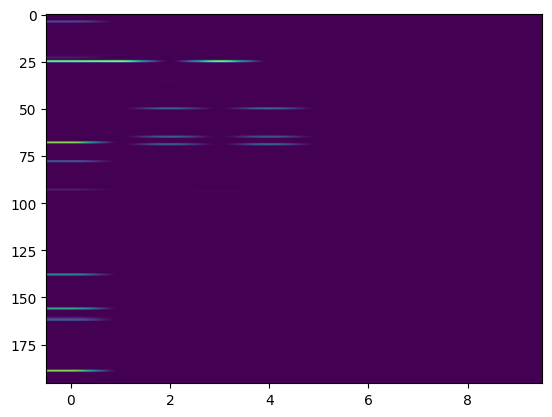

In [475]:
T = 10
U = np.zeros((N, T))
#U[:, 0] = (space.get_wrec() / space.get_wrec().sum(axis=1)) @ da.get_weights()
#U[:, 0] = np.where(U[:, 0] < 0., 0, U[:, 0])
U[:, 0] = np.random.binomial(1, 0.05, (N))*np.random.uniform(0, 1, (N))
beta = 10
U[U[:, 0].argmax(), 1] =1

U[:, 2] = (space.get_wrec()) @ (U[:, 1])
U[:, 2] = np.exp(beta*U[:, 2]) / np.exp(beta*U[:, 2]).sum()

U[:, 3] = (space.get_wrec()) @ (U[:, 2])
U[:, 3] = np.exp(beta*U[:, 3]) / np.exp(beta*U[:, 3]).sum()

U[:, 4] = (space.get_wrec()) @ (U[:, 3])
U[:, 4] = np.exp(beta*U[:, 4]) / np.exp(beta*U[:, 4]).sum()
#U[:, 1] /= U[:, 1].max()

plt.imshow(U, aspect="auto");

In [490]:
T = 30
U = np.zeros((N, T))
beta = 40

U[:, 0] = np.random.binomial(1, 0.1, (N))*np.random.uniform(0.9, 1, (N))
U[:, 0] = np.exp(beta*U[:, 0]) / np.exp(beta*U[:, 0]).sum()
U[U[:, 0].argmax(), 1] =1
for i in range(2, T):
    U[:, i] = (space.get_wrec()) @ (U[:, i-1])
    U[:, i] = np.exp(beta*U[:, i]) / np.exp(beta*U[:, i]).sum()

plt.imshow(U, aspect="auto");

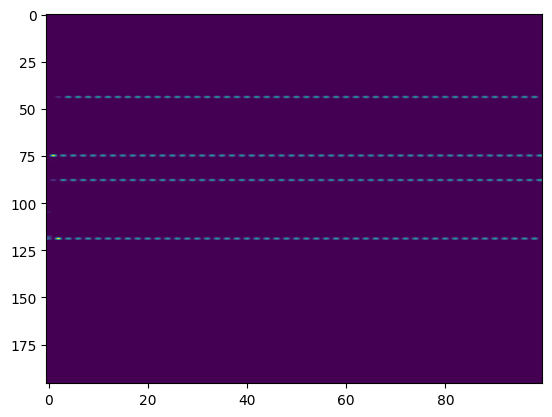

In [154]:
plt.imshow(U, aspect="auto");

In [70]:
(space.get_wrec() / space.get_wrec().sum(axis=1)) @ da.get_weights()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00028178, 0.00193283, 0.00171291, 0.00164972, 0.00176023,
       0.00168569, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00028178, 0.00738

In [67]:
U[:, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
pmp = pclib.PopulationMaxProgram()
pmp

PopulationMaxProgram

In [10]:
gc = pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1, 1])
gc

GridLayerSq

In [12]:
gc

GridLayerSq

---
## new check

#### one run

In [11]:
""" settings """

SPEED = 2.
BOUNDS = [0., 50.]
N = 25**2
action_delay = 3.0

""" initialization """
gcn = pclib.GridNetworkSq([
       pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.005, bounds=[-1, 1, -1, 1])])
space = pclib.PCNNsqv2(N=N, Nj=len(gcn), gain=10., offset=1.2,
           clip_min=0.01,
           threshold=0.2,
           rep_threshold=0.85,
           rec_threshold=15.0,
           num_neighbors=5,
           xfilter=gcn, name="2D")

#
da = pclib.BaseModulation(name="DA", size=N, lr=0.9, threshold=0., max_w=1.0,
                          tau_v=3.0, eq_v=0.0, min_v=0.00)
bnd = pclib.BaseModulation(name="BND", size=N, lr=0.99, threshold=0.1, max_w=1.0,
                           tau_v=1.0, eq_v=0.0, min_v=0.00)
memrepr = pclib.MemoryRepresentation(N, 2.0)
memact = pclib.MemoryAction(2.0)


circuit = pclib.Circuits(da, bnd, memrepr, memact)

trgp = pclib.TargetProgram(space.get_connectivity(), space.get_centers(),
                           da.get_weights(), SPEED)

expmd = pclib.ExperienceModule(speed=SPEED,
                               circuits=circuit,
                               space=space, weights=[-1., 0., 0., -1., -1.],
                               action_delay=action_delay)

brain = pclib.Brain(circuit, space, trgp, expmd)

plan_ = []

# ---
s = [SPEED, SPEED]
points = [[4., 4.5]]
x, y = points[0]
var1 = [0.]

[+] GridNetwork created
[updating actions in ActionSampler2D]
[+] speed: 6.000000


**run**

In [13]:
tra = []
color = "Greys"
collision = 0.
reward = 0.
rx, ry, rs = 15, 20, 4
rt = 0
rdur = 100
nb_rw = 0
delay = 0
tplot = 2
offset = 3

tot = 10000

plt.figure(figsize=(10, 10))
plt.subplot(111)
plt.pause(0.0001)


for t in range(tot):

    # update sim
    x += s[0]
    y += s[1]

    # collision
    if x <= BOUNDS[0] or x >= BOUNDS[1]:

        s[0] *= -1
        x += s[0]*2.
        #color = "Reds"
        delay = 10
        collision = 1.
    elif y <= BOUNDS[0] or y >= BOUNDS[1]:
        s[1] *= -1
        y += s[1]*2.
        #color = "Oranges"
        delay = 10
        collision = 1.
    else:
        collision = 0.
        if delay == 0:
            color = "Greys"
        else:
            delay -= 1

    # there's a reward
    if rt > 0:
        rt = max((0, rt-1));
        trigger = False;
        reward = 0
    else: 
        trigger = True;

    #dist = np.exp(-np.sqrt((x-rx)**2 + (y-ry)**2) / rs)
    dist = np.sqrt((x-rx)**2 + (y-ry)**2)

    if dist < rs:
        rt = rdur
        nb_rw += 1
        reward = 1.
    else:
        reward = 0

    # record
    points += [[x, y]]

    # fwd
    s = brain(s, collision, reward, trigger)
    
    # get the plan
    pos_plan = np.array(brain.get_plan_positions(points[-1]))
    score_plan = np.array(brain.get_plan_scores())

    #print(expmd.get_all_plan_scores())
    #print(brain.get_plan_score())

    # plot
    if t % tplot == 0:
        
      
        clear_output(wait=True)
        
        plt.figure(figsize=(8, 8))
        
        plt.subplot(221)
        if brain.get_directive() == "trg":
            hcolor = "green"
        else:
            hcolor = "red"
            # ax1.plot(*pos_plan.T, "b-", alpha=0.3)
            plt.scatter(*pos_plan.T, c=score_plan, cmap="RdYlGn", alpha=0.6, s=90,
                        edgecolors="black", linewidths=0.5)
            
        #plt.scatter(*np.array(points)[2:].T, c=activity[:, :t].sum(axis=0), cmap='plasma', s=90, vmin=0., vmax=0.1, alpha=0.9)
        #plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=100, marker="o")
        plt.scatter(rx, ry, alpha=0.9, color='green', s=210, marker="x")
            
        #plt.xticks(())
        #plt.yticks(())
        plt.title(f"Trajectory [{t}] | #:{len(space)} [r.{nb_rw}]")

        plt.xlim(BOUNDS[0]-3, BOUNDS[1]+3)
        plt.ylim(BOUNDS[0]-3, BOUNDS[1]+3)

        plt.subplot(222)
        #plt.scatter(*space.get_centers(nonzero=False).T, cmap="Greys", alpha=0.5)
        #plt.scatter(*space.get_centers(nonzero=False).T, c=activity[:, t], cmap=color)
        #for edge in space.make_edges():
        #    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.07, color="black")
        plt.scatter(*space.get_centers().T+offset, alpha=0.4)
        plt.plot(*np.array(points).T, "r-", alpha=0.3)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=10)
        plt.xlim(BOUNDS[0], BOUNDS[1])
        plt.ylim(BOUNDS[0], BOUNDS[1])
        
        #tc = ((space.get_basis() * da.get_weights().reshape(-1, 1)) / da.get_weights().sum()).sum(axis=0)
        #plt.scatter(tc[0], tc[1], s=200, c="green", marker="v")

        #plt.xticks(())
        #plt.yticks(())
        plt.title(f"Place Cells | Active: {trgp.is_active()} | {trigger=}")
        
        plt.subplot(224)
        plt.scatter(*space.get_centers().T, c=da.get_weights(), s=100, cmap="Greens", alpha=0.5)
        #plt.imshow(da.get_weights().reshape(1,-1), aspect="auto")
        #plt.bar(range(1), bnd.get_leaky_v())
        #plt.imshow(activity[:, max(0, t-20):t], cmap="viridis", aspect="auto")
        plt.xlim(BOUNDS[0]-10, BOUNDS[1]+10)
        plt.ylim(BOUNDS[0]-10, BOUNDS[1]+10)
        #plt.imshow(space.get_wff(), aspect="auto", vmin=0.)
        plt.xticks(())
        plt.yticks(())
        plt.title(f"Velocity={np.around(s, 2)} | maxw={da.get_weights().max():.3f}")

        plt.subplot(223)
        #plt.scatter(*np.array(points).T, c=var1, alpha=1., cmap="Reds", s=50)
        plt.scatter(*space.get_centers().T, c=bnd.get_weights(),
                    s=100, cmap="Blues", alpha=0.5, vmin=0., vmax=0.1)
        plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=10)
        plt.xlim(BOUNDS[0]-10, BOUNDS[1]+10)
        plt.ylim(BOUNDS[0]-10, BOUNDS[1]+10)
        plt.xticks(())
        plt.yticks(())
        plt.title(f"Boundary representation | maxw={bnd.get_weights().max():.2f}")
        plt.pause(0.00001)

plt.show()

logger(f"count={nb_rw}")


KeyboardInterrupt: 

/var/folders/77/b66qkr5d21l_3nnw6f563fw80000gp/T/ipykernel_15536/4236937493.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*space.get_centers().T+offset, alpha=0.8, cmap="Oranges")


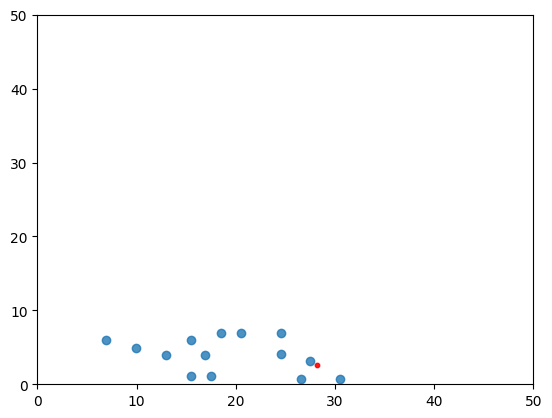

In [4]:
#plt.scatter(*space.get_centers().T+offset, alpha=0.4)
plt.scatter(*space.get_centers().T+offset, alpha=0.8, cmap="Oranges")

plt.scatter(points[-1][0], points[-1][1], alpha=0.9, color='red', s=10)
plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])
plt.show()

In [5]:
brain.get_plan_scores(), "", brain.get_plan_score(),"", expmd.get_all_plan_scores()

([0.0, -0.020761597901582718],
 '',
 -0.020761597901582718,
 '',
 [-0.04226792976260185,
  -0.042045898735523224,
  -0.08579063415527344,
  -0.11117582023143768,
  -0.06342530250549316,
  -0.03568611666560173,
  -0.020761597901582718,
  -0.0956387147307396])

In [6]:
for i in range(8):
    print(f"action={np.around(expmd.get_actions()[i], 3)}\n#{np.around(expmd.get_all_plan_values()[i], 3)}, ",
         f"({expmd.get_all_plan_scores()[i]:.3f})")

action=[2. 0.]
#[-0.     0.    -0.043],  (-0.042)
action=[1. 1.]
#[-0.     0.    -0.047],  (-0.042)
action=[-0.     1.414]
#[-0.     0.    -0.095],  (-0.086)
action=[-1.  1.]
#[-0.     0.    -0.113],  (-0.111)
action=[-1.414 -0.   ]
#[-0.     0.    -0.071],  (-0.063)
action=[-1. -1.]
#[-0.    0.   -0.04],  (-0.036)
action=[ 0.    -1.414]
#[-0.    0.   -0.03],  (-0.021)
action=[ 1. -1.]
#[-0.     0.    -0.098],  (-0.096)


In [7]:
s

[1.6864326823906595e-08, -1.4142135381698608]

In [14]:
expmd.get_actions()

[[1.0, 0.0],
 [0.7071067690849304, 0.7071067690849304],
 [-4.371138828673793e-08, 1.0],
 [-0.7071067690849304, 0.7071067690849304],
 [-1.0, -8.742277657347586e-08],
 [-0.7071066498756409, -0.70710688829422],
 [1.1924880638503055e-08, -1.0],
 [0.7071070075035095, -0.7071065306663513]]

In [36]:
space.get_position()

[31.86477279663086, 44.4516487121582]

In [38]:
space.get_activation().max()

0.0

In [9]:
expmd.get_plan()

([[0.0, -1.0], [1.0, 0.0], [1.0, 0.0]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 3,
 [[23.997282028198242, 32.503021240234375],
  [23.997282028198242, 31.503021240234375],
  [23.997282028198242, 30.503021240234375],
  [23.997282028198242, 29.503021240234375],
  [23.997282028198242, 28.503021240234375],
  [24.997282028198242, 28.503021240234375],
  [25.997282028198242, 28.503021240234375],
  [26.997282028198242, 28.503021240234375],
  [27.997282028198242, 28.503021240234375],
  [28.997282028198242, 28.503021240234375],
  [29.997282028198242, 28.503021240234375],
  [30.997282028198242, 28.503021240234375],
  [31.997282028198242, 28.503021240234375]])

In [8]:
expmd.get_all_values_seq()

[[[0.0, 0.0, 0.0]],
 [[1.7141147246560694e-28, 0.0, 0.011284993030130863],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [[0.0, 0.0, 0.013254447840154171],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [[0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.014139214530587196],
  [0.0, 0.0, 0.014139214530587196]]]

#### multiple runs

In [20]:
""" checking """
    
def run(pause=20, duration=1000, BOUNDS=[0., 80.], trg_loc=[10, 10], bndw=-1., pmx=0.):
    
    SPEED = 2
    N = 30**2
    action_delay = 3.0
    
    """ initialization """
    gcn = pclib.GridNetworkSq([
           pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1, 1, -1, 1]),
           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1, 1, -1, 1]),
           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1, 1, -1, 1]),
           pclib.GridLayerSq(sigma=0.04, speed=0.005, bounds=[-1, 1, -1, 1])])
    space = pclib.PCNNsqv2(N=N, Nj=len(gcn), gain=10., offset=1.2,
               clip_min=0.01,
               threshold=0.2,
               rep_threshold=0.85,
               rec_threshold=15.0,
               num_neighbors=5,
               xfilter=gcn, name="2D")
    
    #
    da = pclib.BaseModulation(name="DA", size=N, lr=0.9, threshold=0., max_w=1.0,
                              tau_v=3.0, eq_v=0.0, min_v=0.00)
    bnd = pclib.BaseModulation(name="BND", size=N, lr=0.99, threshold=0.1, max_w=1.0,
                               tau_v=1.0, eq_v=0.0, min_v=0.00)
    
    
    circuit = pclib.Circuits(da, bnd)
    
    trgp = pclib.TargetProgram(space.get_connectivity(), space.get_centers(),
                               da.get_weights(), SPEED)
    
    expmd = pclib.ExperienceModule(speed=SPEED,
                                   circuits=circuit,
                                   space=space, weights=[bndw, 0., pmx, 1., 1.],
                                   action_delay=action_delay,
                                   ma_decay=1.0, mr_decay=1.0)
    
    brain = pclib.Brain(circuit, space, trgp, expmd)
        
    # ---
    s = [SPEED, SPEED]
    points = [[4., 4.5]]
    x, y = points[0]
        
    collision = 0.
    reward = 0.
    rx, ry, rs = trg_loc[0], trg_loc[1], 4
    rt = 0
    nb_rw = 0
    nb_coll = 0
    logger(f"{pause=}")
    
    for t in tqdm(range(duration)):
    
        # update sim
        x += s[0]
        y += s[1]
    
        # collision
        if x <= BOUNDS[0] or x >= BOUNDS[1]:
            s[0] *= -1
            x += s[0]*2.
            nb_coll += 1            
            collision = 1.
        elif y <= BOUNDS[0] or y >= BOUNDS[1]:
            s[1] *= -1
            y += s[1]*2.
            collision = 1.
            nb_coll += 1
        else:
            collision = 0.
    
        # there's a reward
        if rt != 0:
            rt = max((0, rt-1));
            trigger = False
            reward = 0
        else: 
            trigger = True
            reward = 0

        #dist = np.exp(-np.sqrt((x-rx)**2 + (y-ry)**2) / rs)
        dist = np.sqrt((x-rx)**2 + (y-ry)**2)

        if dist < rs:
            rt = pause
            nb_rw += 1
            reward = 1.
        else:
            reward = 0
    
        # record
        points += [[x, y]]
        
        # fwd
        s = brain(s, collision, reward, trigger)
        
    return nb_rw, space, points, nb_coll

In [25]:
""" test """

pause1 = 50000
pause2 = 20000
pause3 = 50000
BOUNDS=[0., 50.]
duration = 3000
trg_loc = [10, 10]
count1, space1, traj1, coll1 = run(pause=pause1, duration=duration, BOUNDS=BOUNDS, trg_loc=trg_loc, bndw=-1., pmx=0.)
count2, space2, traj2, coll2 = run(pause=pause2, duration=duration, BOUNDS=BOUNDS, trg_loc=trg_loc, bndw=-1., pmx=1.)
count3, space3, traj3, coll3 = run(pause=pause3, duration=duration, BOUNDS=BOUNDS, trg_loc=trg_loc, bndw=-1., pmx=-1.)


clear_output()
logger(f"[1] pause={pause1} -> count={count1}, collisions={coll1}")
logger(f"[2] pause={pause2} -> count={count2}, collisions={coll2}")
logger(f"[2] pause={pause3} -> count={count3}, collisions={coll3}")

2025-01-30 18:04:09 | [1] pause=50000 -> count=29, collisions=76
2025-01-30 18:04:09 | [2] pause=20000 -> count=0, collisions=0
2025-01-30 18:04:09 | [2] pause=50000 -> count=5, collisions=1410


In [26]:
""" spaces """

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(*np.array(traj1).T, "r-", alpha=0.4, lw=1)
plt.scatter(*trg_loc, color="green", marker="x", s=100)

plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])

plt.subplot(132)
plt.plot(*np.array(traj2).T, "r-", alpha=0.4, lw=1)
plt.scatter(*trg_loc, color="green", marker="x", s=100)
plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])

plt.subplot(133)

plt.plot(*np.array(traj3).T, "r-", alpha=0.4, lw=1)
plt.scatter(*trg_loc, color="green", marker="x", s=100)

plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])
plt.show()

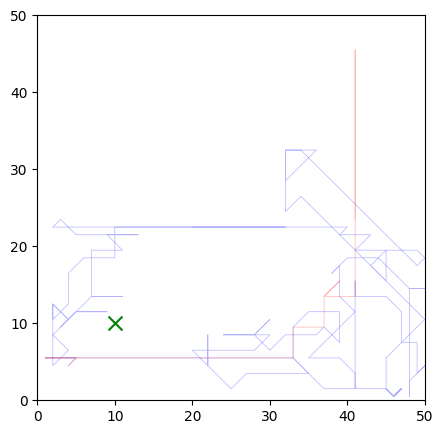

In [22]:
""" spaces """

z = np.zeros(len(space1.get_activation()))
z[brain.get_plan()] = 1

plt.figure(figsize=(5, 5))
#plt.scatter(*np.array(traj1).T, color="blue", alpha=0.1, marker=".")
plt.plot(*np.array(traj1).T, color="blue", alpha=0.3, lw=0.5)

z = np.zeros(len(space2.get_activation()))
z[brain.get_plan()] = 1
#plt.scatter(*np.array(traj2).T, color="red", alpha=0.1, marker=".")
plt.plot(*np.array(traj2).T, color="red", alpha=0.3, lw=0.5)

plt.scatter(*trg_loc, color="green", marker="x", s=100)

plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])
plt.show()

#### further studies

In [5]:
""" test over multiple locations """
tot = 2

pause1 = 5000
pause2 = 20
BOUNDS=[0., 50.]
duration = 2000

all_trg_locs = np.random.randint(BOUNDS[0]+3, BOUNDS[1]-3, size=(tot, 2))
#plt.figure(figsize=(7, tot*3))
_, axs = plt.subplots(tot, 2, figsize=(6, tot*3))

for i, trg_loc in enumerate(all_trg_locs):
    """ test """
    logger(f"{i=}, {trg_loc=}")

    count1, space1, traj1, _ = run(pause=pause1, duration=duration, BOUNDS=BOUNDS, trg_loc=trg_loc)
    count2, space2, traj2, _ = run(pause=pause2, duration=duration, BOUNDS=BOUNDS, trg_loc=trg_loc)

    clear_output()

    # plot
    circle1 = patches.Circle(trg_loc, 4, edgecolor='green', facecolor='none')
    
    axs[i, 0].plot(*np.array(traj1).T, "b-", alpha=0.4, lw=1)
    axs[i, 0].set_title(f"{count1}")
    axs[i, 0].add_patch(circle1)

    
    axs[i, 0].set_xlim(BOUNDS[0], BOUNDS[1])
    axs[i, 0].set_ylim(BOUNDS[0], BOUNDS[1])
    axs[i, 0].set_xticks(())
    axs[i, 0].set_yticks(())
    
    #
    circle2 = patches.Circle(trg_loc, 4, edgecolor='green', facecolor='none')
    axs[i, 1].plot(*np.array(traj2).T, "r-", alpha=0.4, lw=1)
    axs[i, 1].add_patch(circle2)
    axs[i, 1].set_title(f"{count2}")
    
    axs[i, 1].set_xlim(BOUNDS[0], BOUNDS[1])
    axs[i, 1].set_ylim(BOUNDS[0], BOUNDS[1])
    axs[i, 1].set_xticks(())
    axs[i, 1].set_yticks(())
    
plt.show()

In [7]:
expmd.get_plan()

([[0.0, -4.0],
  [-4.0, 0.0],
  [0.0, -4.0],
  [1.9996980428695679, -1.9996980428695679],
  [0.0, -4.0],
  [4.0, 0.0],
  [4.0, 0.0],
  [-1.9996980428695679, 1.9996980428695679],
  [1.9996980428695679, -1.9996980428695679],
  [4.0, 0.0],
  [-1.9996980428695679, 1.9996980428695679],
  [4.0, 0.0],
  [-1.9996980428695679, 1.9996980428695679],
  [0.0, 4.0],
  [0.0, -4.0],
  [4.0, 0.0]],
 [[-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0],
  [-0.0, 0.0, 0.0]],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 16,
 [[0.0, 0.0]])

In [7]:
(space.get_centers() * da.get_weights().reshape(-1, 1)).sum(axis=0) / da.get_weights().sum()

array([8.08612 , 9.745244], dtype=float32)

In [3]:
brain.get_plan()

[83, 20, 61, 25]

In [7]:
z = np.zeros(len(space.get_activation()))
z[brain.get_plan()] = 1

plt.figure(figsize=(5, 5))
plt.scatter(*space.get_centers(nonzero=True).T, c=z, cmap="RdYlGn", alpha=np.clip(z, 0.3, 1.))

for edge in space.make_edges():
    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.1, color="black")

plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])
plt.show()

In [5]:
plt.imshow(space.get_wrec());

In [8]:
expmd.get_plan()

([[0.0, 0.0]], [[0.0, 0.0, 0.0]], [], 0, [[0.0, 0.0]])

In [3]:
brain.get_representation()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01631851,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [4]:
(space.get_centers() * brain.get_representation().reshape(-1, 1)).sum(axis=0)/brain.get_representation().sum()

array([0.5, 0.5], dtype=float32)

In [14]:
z = np.zeros((N))
z[space.get_wrec()[4].argmax()] = 1
trgp.update(z, True)

False

start_idx: 55
end_idx: 29
<[-] short plan>
[-] invalid plan!!!


In [24]:
trgp.make_shortest_path(space.get_connectivity(), 4, da.get_weights().argmax())

[4, 29, 55]

In [22]:
space.get_wrec()[da.get_weights().argmax()]

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 1.5809475, 1.5811865,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 2.1212134, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [17]:
space.get_wrec()[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.8284276 ,
       0.        , 0.99984896, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 2.5492728 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.5809958 , 0.        , 0.        , 0.     

---

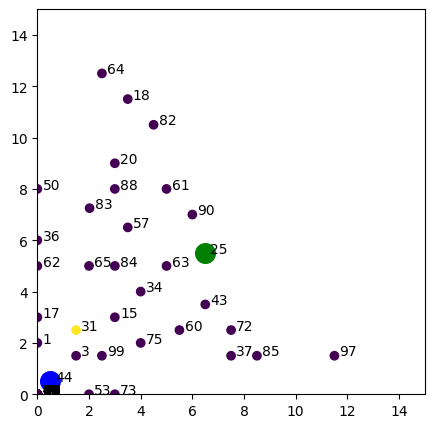

In [5]:
wr = space.get_wrec()
uc = space.get_activation()
ut = trgp.get_trg_representation()

tagsc = np.zeros_like(uc)
tagst = np.zeros_like(ut)
tagsc[uc>0] = 1
tagst[ut>0] = 1

for t in range(1, 11):
    uc = ((wr + np.eye(len(uc))) @ uc).flatten()
    ut = ((wr + np.eye(len(ut))) @ ut).flatten()
    uc /= uc.max()
    ut /= ut.max()
    tagsc = tagsc-np.where(tagsc>0, tagsc, 0) / 5 + np.where(uc>0, 1, 0) * np.where(tagsc>0, 0, 1)
    tagst = tagst-np.where(tagst>0, tagst, 0) / 5 + np.where(ut>0, 1, 0) * np.where(tagst>0, 0, 1)

# --- #
path = [space.get_activation().argmax()]
mask = np.zeros(len(uc))
wc = space.get_connectivity()
neighbs = np.zeros(len(uc))
vals = tagst*tagsc
idxs = np.arange(len(uc))[tagst*tagsc>0]

pidx = [space.get_activation().argmax()]
z = np.zeros(len(uc))
z[pidx[-1]] = 1
mask_set = np.zeros(len(uc))
for _ in range(len(uc)):

    neighbs *= 0.
    neighbs += 1000
    loc_idxs = wc[:, pidx[-1]].astype(bool) 
    values = vals[loc_idxs]+mask_set[loc_idxs]
    neighbs[loc_idxs] = values
    pidx += [neighbs.argmin()]
    mask_set[pidx[-1]] = 1000
    mask_set[wc[:, pidx[-1]].astype(bool)] = 1000

    z[pidx[-1]] = 1

plt.figure(figsize=(5, 5))
ct = tagsc+tagst
#plt.scatter(*space.get_centers(nonzero=True).T, c=ct, s=200*ct, cmap="plasma_r", alpha=1.)
plt.scatter(*space.get_centers(nonzero=True).T, c=z)
for i, p in enumerate(space.get_centers(nonzero=True)):
    plt.text(p[0]+0.2, p[1], f"{i:.0f}")
    
plt.scatter(*((np.abs(space.get_centers() * space.get_activation().reshape(-1, 1))).sum(axis=0) / space.get_activation().sum()), 
                s=200, marker='o', color="blue")
plt.scatter(*((np.abs(space.get_centers() * da.get_weights().reshape(-1, 1))).sum(axis=0) / da.get_weights().sum()), 
                s=200, marker='o', color="green")
plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])
plt.show()

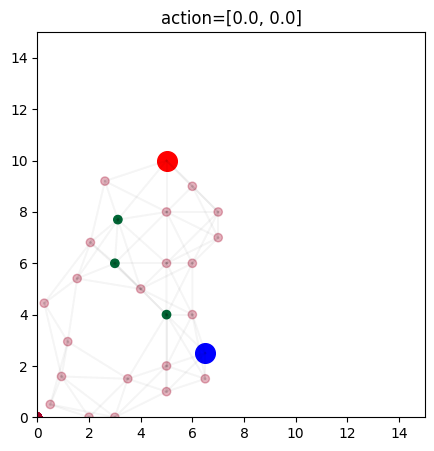

TypeError: step_plan(): incompatible function arguments. The following argument types are supported:
    1. (self: core.build.pclib.TargetProgram, arg0: numpy.ndarray[numpy.float32[m, 1]]) -> Annotated[list[float], FixedSize(2)]

Invoked with: TargetProgram

In [4]:
idx = 48#np.random.choice([48, 5, 19])
trgp = pclib.TargetProgram(space.get_connectivity(), space.get_centers(), da.get_weights(), 1.0)
u = np.zeros(len(space.get_activation()))
u[idx] = 1
trgp.update(u.astype(np.float32))
path = trgp.get_plan()
#print("plan-> ", path)
z = np.zeros(len(space.get_activation()))
z[path] = 1


position = space.get_centers()[idx]
trg_position = space.get_centers()[trgp.get_trg_representation().argmax()]
action = np.array([0.0, 0.0])


while bool(np.linalg.norm(position-trg_position)):

    clear_output(wait=True)
    plt.figure(figsize=(5, 5))
    plt.scatter(*space.get_centers(nonzero=True).T, c=z, cmap="RdYlGn", alpha=np.clip(z, 0.3, 1.))
    plt.scatter(*position, color="red", s=200)
    plt.scatter(*trg_position, color="blue", s=200)
    
    for edge in space.make_edges():
        plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.02, color="black")
    
    plt.xlim(BOUNDS[0], BOUNDS[1])
    plt.ylim(BOUNDS[0], BOUNDS[1])
    plt.title(f"action={np.around(action, 2).tolist()}")
    plt.pause(0.9)
    
    action = trgp.step_plan()
    position += action
    

plt.show()

In [5]:
np.linalg.norm(position-trg_position)

3.7655075

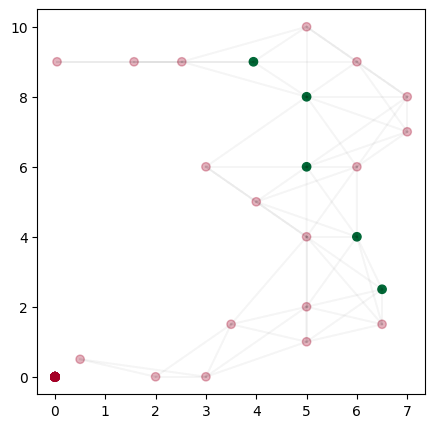

In [11]:
z = np.zeros(len(space.get_activation()))
z[path] = 1

plt.figure(figsize=(5, 5))
plt.scatter(*space.get_centers(nonzero=True).T, c=z, cmap="RdYlGn", alpha=np.clip(z, 0.3, 1.))


for edge in space.make_edges():
    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.02, color="black")
plt.show()

---

In [41]:
plt.figure(figsize=(5, 5))
plt.scatter(*space.get_centers(nonzero=True).T)
plt.plot(*np.array(space.get_trajectory()).T, alpha=0.2, lw=2)
for edge in space.make_edges():
    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.2, color="blue")
#plt.xlim(BOUNDS[0], BOUNDS[1])
#plt.ylim(BOUNDS[0], BOUNDS[1])
plt.scatter(*((np.abs(space.get_centers() * space.get_activation().reshape(-1, 1))).sum(axis=0) / space.get_activation().sum()), 
            s=200, marker='o')
plt.scatter(*((np.abs(space.get_centers() * da.get_weights().reshape(-1, 1))).sum(axis=0) / da.get_weights().sum()), 
            s=200, marker='o', color="green")
plt.show()

In [7]:
plt.plot(*np.array(space.get_trajectory()).T)
plt.xlim(BOUNDS[0], BOUNDS[1])
plt.ylim(BOUNDS[0], BOUNDS[1])
plt.show()

#### convergence calculation

In [6]:
wr = space.get_wrec()
uc = space.get_activation()
ut = trgp.get_trg_representation()

In [97]:
wr @ (wr @ (wr @ uc))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.1158623 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.45778447, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 2.852681  , 0.        , 0.        ,
       0.        , 0.9331697 , 0.        , 0.46373424, 0.        ,
       0.        , 0.        , 0.23344441, 0.        , 0.        ,
       0.        , 0.52092195, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.1332384 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

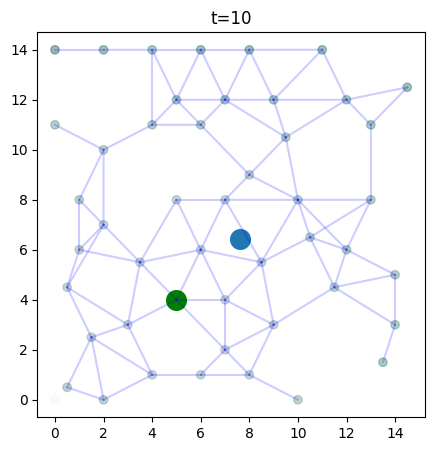

2025-01-25 16:54:04 | 


In [3]:
wr = space.get_wrec()
uc = space.get_activation()
ut = trgp.get_trg_representation()

tagsc = np.zeros_like(uc)
tagst = np.zeros_like(ut)
tagsc[uc>0] = 1
tagst[ut>0] = 1

for t in range(1, 11):
    uc = ((wr + np.eye(len(uc))) @ uc).flatten()
    ut = ((wr + np.eye(len(ut))) @ ut).flatten()
    uc /= uc.max()
    ut /= ut.max()
    tagsc = tagsc-np.where(tagsc>0, tagsc, 0) / 5 + np.where(uc>0, 1, 0) * np.where(tagsc>0, 0, 1)
    tagst = tagst-np.where(tagst>0, tagst, 0) / 5 + np.where(ut>0, 1, 0) * np.where(tagst>0, 0, 1)
    
    clear_output(wait=True)
    plt.figure(figsize=(5, 5))
    plt.scatter(*space.get_centers(nonzero=True).T, c=tagsc, cmap="Blues", alpha=0.2)
    plt.scatter(*space.get_centers(nonzero=True).T, c=tagst, cmap="Greens", alpha=0.2)
    #plt.plot(*np.array(space.get_trajectory()).T, alpha=0.2, lw=2)
    for edge in space.make_edges():
        plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.1, color="blue")
        
    plt.scatter(*((np.abs(space.get_centers() * space.get_activation().reshape(-1, 1))).sum(axis=0) / space.get_activation().sum()), 
                s=200, marker='o')
    plt.scatter(*((np.abs(space.get_centers() * da.get_weights().reshape(-1, 1))).sum(axis=0) / da.get_weights().sum()), 
                s=200, marker='o', color="green")
    plt.title(f"{t=}")
    plt.pause(0.5)
logger()

In [244]:
path = [uc.argmax()]
mask = np.zeros(len(uc))
vals = tagst*tagsc
vals = vals[vals>0]
idxs = np.arange(len(uc))[tagst*tagsc>0]

In [255]:
np.arange(len(uc))[tagst*tagsc>0], vals, tagst*tagsc

(array([ 1,  3,  5,  7,  8, 11, 12, 16, 22, 23, 25, 30, 32, 36, 37, 38, 41,
        42, 44, 45, 46, 47, 48, 54, 56, 57, 58, 59, 60, 61, 63, 66, 67, 68,
        74, 75, 76, 78, 80, 84, 85, 87, 88, 89, 90, 91, 93, 94, 99]),
 array([0.06871948, 0.04398047, 0.04398047, 0.10737418, 0.06871948,
        0.06871948, 0.13421773, 0.04398047, 0.10737418, 0.2097152 ,
        0.04398047, 0.08589935, 0.04398047, 0.04398047, 0.13421773,
        0.04398047, 0.08589935, 0.06871948, 0.04398047, 0.04398047,
        0.05497558, 0.06871948, 0.04398047, 0.05497558, 0.08589935,
        0.06871948, 0.04398047, 0.06871948, 0.04398047, 0.06871948,
        0.08589935, 0.10737418, 0.08589935, 0.05497558, 0.08589935,
        0.04398047, 0.08589935, 0.05497558, 0.04398047, 0.04398047,
        0.05497558, 0.06871948, 0.04398047, 0.08589935, 0.05497558,
        0.05497558, 0.06871948, 0.04398047, 0.10737418]),
 array([0.        , 0.06871948, 0.        , 0.04398047, 0.        ,
        0.04398047, 0.        , 0.107374

In [272]:
wc[:, pidx[-1]].astype(bool)

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [294]:
[wc[:, uc.argmax()].astype(bool)]

[array([False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False,  True, False,  True, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False])]

In [300]:
neighbs.

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04398047, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04398047, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05497558, 0.        , 0.04398047, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05497558,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [297]:
neighbs = np.zeros(len(uc))
vals = tagst*tagsc

wc[:, uc.argmax()]
neighbs[wc[:, uc.argmax()].astype(bool)] = vals[wc[:, uc.argmax()].astype(bool)]

In [5]:
path = [space.get_activation().argmax()]
mask = np.zeros(len(uc))
wc = space.get_connectivity()
neighbs = np.zeros(len(uc))
vals = tagst*tagsc
#vals = vals[vals>0]
idxs = np.arange(len(uc))[tagst*tagsc>0]
pidx = [space.get_activation().argmax()]
z = np.zeros(len(uc))
z[pidx[-1]] = 1
mask_set = np.zeros(len(uc))
for _ in range(len(uc)):

    neighbs *= 0.
    neighbs += 1000
    loc_idxs = wc[:, pidx[-1]].astype(bool) 
    if sum(loc_idxs) == 0:
        print("===")
        break
    values = vals[loc_idxs]+mask_set[loc_idxs]
    neighbs[loc_idxs] = values
    print(loc_idxs, wc[:, pidx[-1]])
    pidx += [neighbs.argmin()]
    mask_set[pidx[-1]] = 1000
    mask_set[wc[:, pidx[-1]].astype(bool)] = 1000
    print(pidx[-1], mask_set)

    z[pidx[-1]] = 1

print(pidx, z)

[False False False False  True False False  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True] [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]
70 [   0.    0.    0.    0.    0.    0.    0. 1000.    0.    0.    0.    0.
    0.  

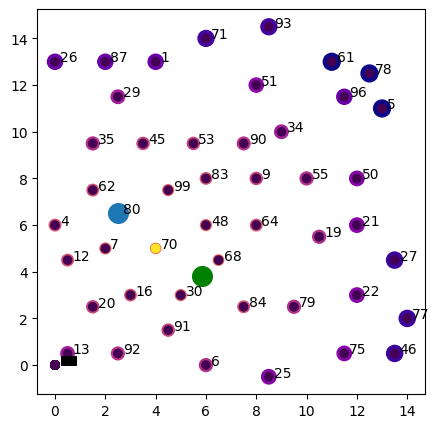

In [8]:
plt.figure(figsize=(5, 5))
ct = tagsc+tagst
plt.scatter(*space.get_centers(nonzero=True).T, c=ct, s=200*ct, cmap="plasma_r", alpha=1.)
plt.scatter(*space.get_centers(nonzero=True).T, c=z)
for i, p in enumerate(space.get_centers(nonzero=True)):
    plt.text(p[0]+0.2, p[1], f"{i:.0f}")
plt.scatter(*((np.abs(space.get_centers() * space.get_activation().reshape(-1, 1))).sum(axis=0) / space.get_activation().sum()), 
                s=200, marker='o')
plt.scatter(*((np.abs(space.get_centers() * da.get_weights().reshape(-1, 1))).sum(axis=0) / da.get_weights().sum()), 
                s=200, marker='o', color="green")
plt.show()

[False False False False False False False False False False False False
 False False False False False False False  True False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]
96 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.  

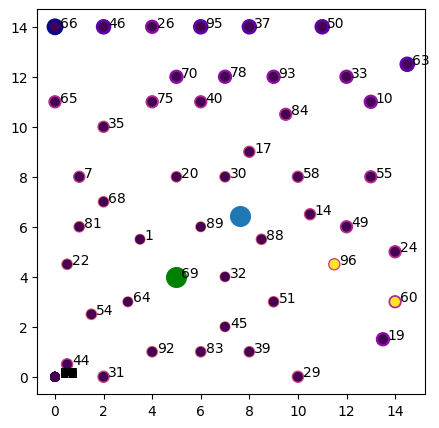

In [3]:
wr = space.get_wrec()
uc = space.get_activation()
ut = trgp.get_trg_representation()

tagsc = np.zeros_like(uc)
tagst = np.zeros_like(ut)
tagsc[uc>0] = 1
tagst[ut>0] = 1

for t in range(1, 11):
    uc = ((wr + np.eye(len(uc))) @ uc).flatten()
    ut = ((wr + np.eye(len(ut))) @ ut).flatten()
    uc /= uc.max()
    ut /= ut.max()
    tagsc = tagsc-np.where(tagsc>0, tagsc, 0) / 5 + np.where(uc>0, 1, 0) * np.where(tagsc>0, 0, 1)
    tagst = tagst-np.where(tagst>0, tagst, 0) / 5 + np.where(ut>0, 1, 0) * np.where(tagst>0, 0, 1)

# --- #
path = [space.get_activation().argmax()]
mask = np.zeros(len(uc))
wc = space.get_connectivity()
neighbs = np.zeros(len(uc))
vals = tagst*tagsc
idxs = np.arange(len(uc))[tagst*tagsc>0]
pidx = [space.get_activation().argmax()]
z = np.zeros(len(uc))
z[pidx[-1]] = 1
mask_set = np.zeros(len(uc))
for _ in range(len(uc)):

    neighbs *= 0.
    neighbs += 1000
    loc_idxs = wc[:, pidx[-1]].astype(bool) 
    if sum(loc_idxs) == 0:
        print("===")
        break
    values = vals[loc_idxs]+mask_set[loc_idxs]
    neighbs[loc_idxs] = values
    print(loc_idxs, wc[:, pidx[-1]])
    pidx += [neighbs.argmin()]
    mask_set[pidx[-1]] = 1000
    mask_set[wc[:, pidx[-1]].astype(bool)] = 1000
    print(pidx[-1], mask_set)

    z[pidx[-1]] = 1

plt.figure(figsize=(5, 5))
ct = tagsc+tagst
plt.scatter(*space.get_centers(nonzero=True).T, c=ct, s=200*ct, cmap="plasma_r", alpha=1.)
plt.scatter(*space.get_centers(nonzero=True).T, c=z)
for i, p in enumerate(space.get_centers(nonzero=True)):
    plt.text(p[0]+0.2, p[1], f"{i:.0f}")
plt.scatter(*((np.abs(space.get_centers() * space.get_activation().reshape(-1, 1))).sum(axis=0) / space.get_activation().sum()), 
                s=200, marker='o')
plt.scatter(*((np.abs(space.get_centers() * da.get_weights().reshape(-1, 1))).sum(axis=0) / da.get_weights().sum()), 
                s=200, marker='o', color="green")
plt.show()

In [4]:
trgq = pclib.TargetProgram2(space.get_connectivity(), space.get_centers(), da.get_weights(), 0.5)

[+] TargetProgramV2 created


In [5]:
trgq.update(space.get_activation().astype(np.float32))
trgq.get_plan()

[]

da weights
start_idx: 69
end_idx: 60
plan
69 32 51 96 60 depth: 4
[+] Plan created


In [6]:
trgq.step_plan()

array([0., 0.], dtype=float32)

In [ ]:
z = np.zeros(len(uc))
z[path] = 1

plt.figure(figsize=(5, 5))
plt.scatter(*space.get_centers(nonzero=True).T, c=z)


for edge in space.make_edges():
    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.1, color="blue")
plt.show()

In [6]:

space.get_activation().astype(np.float32).argmax()

60

In [8]:
da.get_weights().shape

(100,)

In [7]:
trgq.set_da_weights(da.get_weights())
trgq.set_wrec(space.get_wrec())

In [9]:
curr = np.zeros(len(uc))
curr[65] = 1.
trgq.update(curr.astype(np.float32))

da weights
start_idx: 69
end_idx: 65
plan
[-] No plan, size < 1
[-] No plan


In [11]:
da.get_weights().argmax()

69

In [18]:
trgq.step_plan()

array([0., 0.], dtype=float32)

In [16]:
trgq.get_trg_representation().argmax() 

69

In [33]:
trgq.make_shortest_path(space.get_connectivity(), 50, 32)

[50, 33, 84, 58, 88, 32]

In [32]:
shortest_path(space.get_connectivity(), 50, 32)

([50, 33, 84, 58, 88, 32], 5)

In [ ]:
z = np.zeros(len(uc))
z[path] = 1

plt.figure(figsize=(5, 5))
plt.scatter(*space.get_centers(nonzero=True).T, c=z)


for edge in space.make_edges():
    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.1, color="blue")
plt.show()

---

In [43]:
import heapq

def shortest_path(connectivity_matrix, start_node, end_node):
    """
    Find the shortest path between start_node and end_node using Dijkstra's algorithm.
    
    Parameters:
        connectivity_matrix (np.ndarray): NxN adjacency matrix (real values or 1s/0s).
        start_node (int): Index of the starting node.
        end_node (int): Index of the ending node.
    
    Returns:
        path (list): The sequence of nodes representing the shortest path.
        distance (float): The total cost of the shortest path.
    """
    num_nodes = connectivity_matrix.shape[0]
    distances = [float('inf')] * num_nodes
    distances[start_node] = 0
    previous_nodes = [-1] * num_nodes
    
    priority_queue = [(0, start_node)]  # (distance, node)
    
    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)
        
        if current_distance > distances[current_node]:
            continue
        
        for neighbor in range(num_nodes):
            if connectivity_matrix[current_node, neighbor] > 0:  # Edge exists
                distance = current_distance + connectivity_matrix[current_node, neighbor]
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    previous_nodes[neighbor] = current_node
                    heapq.heappush(priority_queue, (distance, neighbor))
    
    path = []
    current = end_node
    while current != -1:
        path.append(current)
        current = previous_nodes[current]
    path.reverse()
    
    if distances[end_node] == float('inf'):
        return None, float('inf')  # No path exists
    
    return path, distances[end_node]


In [44]:
from collections import deque

def shortest_path(connectivity_matrix, start_node, end_node):
    """
    Find the shortest path in an unweighted graph using BFS.
    
    Parameters:
        connectivity_matrix (np.ndarray): NxN adjacency matrix with 1s/0s.
        start_node (int): Index of the starting node.
        end_node (int): Index of the ending node.
    
    Returns:
        path (list): The sequence of nodes representing the shortest path.
        distance (int): The number of edges in the shortest path.
    """
    num_nodes = connectivity_matrix.shape[0]
    visited = [False] * num_nodes
    parent = [-1] * num_nodes
    
    queue = deque([start_node])
    visited[start_node] = True
    
    while queue:
        current_node = queue.popleft()
        
        if current_node == end_node:
            break
        
        for neighbor in range(num_nodes):
            if connectivity_matrix[current_node, neighbor] == 1 and not visited[neighbor]:
                visited[neighbor] = True
                parent[neighbor] = current_node
                queue.append(neighbor)
    
    # Reconstruct the path
    path = []
    current = end_node
    while current != -1:
        path.append(current)
        current = parent[current]
    path.reverse()
    
    if path[0] != start_node:  # No path found
        return None, -1
    
    return path, len(path) - 1

In [74]:
shortest_path(space.get_connectivity(), 20, 33)

([20, 30, 17, 84, 33], 4)

In [77]:
curr = np.zeros(len(uc))
curr[20] = 1.
path, dists = shortest_path(space.get_connectivity(), 20, 33)
#path = []
#path += [space.get_activation().argmax()]
#path += [da.get_weights().argmax()]
z = np.zeros(len(uc))
z[path] = 1
path

[20, 30, 17, 84, 33]

In [385]:
path

[60, 44]

In [37]:
curr = np.zeros(len(uc))
curr[3] = 1.

In [80]:
z = np.zeros(len(uc))
z[path] = 1

plt.figure(figsize=(5, 5))
plt.scatter(*space.get_centers(nonzero=True).T, c=z)


for edge in space.make_edges():
    plt.plot((edge[0][0], edge[1][0]), (edge[0][1], edge[1][1]), alpha=0.1, color="blue")
plt.show()

In [195]:
vals = tagst*tagsc
vals = vals[vals>0]
vals

array([0.06871948, 0.04398047, 0.04398047, 0.10737418, 0.06871948,
       0.06871948, 0.13421773, 0.04398047, 0.10737418, 0.2097152 ,
       0.04398047, 0.08589935, 0.04398047, 0.04398047, 0.13421773,
       0.04398047, 0.08589935, 0.06871948, 0.04398047, 0.04398047,
       0.05497558, 0.06871948, 0.04398047, 0.05497558, 0.08589935,
       0.06871948, 0.04398047, 0.06871948, 0.04398047, 0.06871948,
       0.08589935, 0.10737418, 0.08589935, 0.05497558, 0.08589935,
       0.04398047, 0.08589935, 0.05497558, 0.04398047, 0.04398047,
       0.05497558, 0.06871948, 0.04398047, 0.08589935, 0.05497558,
       0.05497558, 0.06871948, 0.04398047, 0.10737418])

In [9]:
plt.imshow(space.get_wrec(), aspect="auto");

In [131]:
def estimate(wrec, uc, ut):
    tags = np.zeros_like(uc)
    u = uc.copy()
    tags[u>0] = 1
    t = 0
    while True:
        u = wrec @ u
        u /= u.max()
        tags += np.where(u>0, 1, 0) * np.where(tags == 0, 1, 0)
        if tags[ut>0].sum() > 0:
            break
        t += 1
        tags /= 1
    return tags

In [132]:
tags = estimate(wr, uc, ut)

In [133]:
tags

array([0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

#### study: values

In [42]:
aseq, vseq, sseq, depth = expmd.get_plan()
vseq

[[-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0],
 [-0.0, 0.0, 0.0, 0.0]]

In [14]:
trgp.get_trg_representation()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00236289, 0.        , 0.     

In [31]:
(np.abs(space.get_centers() * space.get_activation().reshape(-1, 1))).sum(axis=0) / space.get_activation().sum()

array([ 1.2256824, 12.376456 ], dtype=float32)

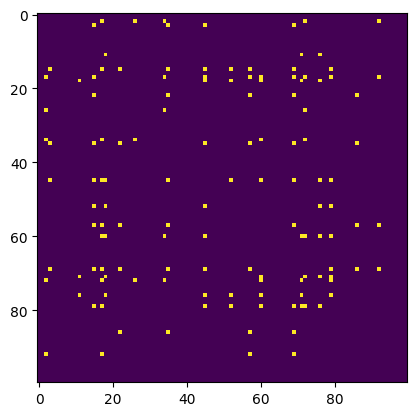

In [5]:
plt.imshow(space.get_connectivity());

In [6]:
space.make_edges()

[[[0.5, 2.499999761581421], [4.500150680541992, 6.499850273132324]],
 [[0.5, 2.499999761581421], [0.5, 0.5]],
 [[0.5, 2.499999761581421], [3.000075340270996, 2.000075340270996]],
 [[0.5, 2.499999761581421], [5.999924659729004, 2.000075340270996]],
 [[0.5, 2.499999761581421], [-0.4966829717159271, 7.499698638916016]],
 [[8.500452041625977, 13.500603675842285], [7.5, 10.50090503692627]],
 [[8.500452041625977, 13.500603675842285], [5.5, 12.50090503692627]],
 [[8.500452041625977, 13.500603675842285],
  [8.999773979187012, 8.000679016113281]],
 [[8.500452041625977, 13.500603675842285],
  [4.500452041625977, 10.50090503692627]],
 [[13.500301361083984, 0.5001511573791504],
  [13.000226020812988, 3.9996235370635986]],
 [[13.500301361083984, 0.5001511573791504],
  [11.000527381896973, 1.9999256134033203]],
 [[13.500301361083984, 0.5001511573791504],
  [12.000226020812988, 5.999624252319336]],
 [[7.5, 10.50090503692627], [8.500452041625977, 13.500603675842285]],
 [[7.5, 10.50090503692627], [4.50

**Place Cells**

In [23]:
traj = np.array(pcnn2d.trajectory)
record = np.array(pcnn2d.record_pcnn)

centers = pcnn2d.pcnn2D.get_centers()

plt.figure(figsize=(10, 10))
for i, ax in enumerate(pcnn2d.axs):

    plt.subplot(int(np.sqrt(N)), int(np.sqrt(N)), i+1)

    plt.plot(traj[:, 0], traj[:, 1],
            "k", alpha=0.1, lw=0.4)
    plt.scatter(traj[:, 0], traj[:, 1],
               c=record[:, i], cmap="plasma",
               s=50*record[:, i],
               alpha=0.9)

    #plt.scatter(centers[i, 0], centers[i, 1],
    #           c="k", s=15)
    #plt.axis("off")
    #plt.title(f"{np.sum(record[-1, i]):.3f}")
    #plt.xlim(0, 20)
    #plt.ylim(0, 20)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [30]:
plt.plot(*np.array(space.get_trajectory()).T);

[[0.5, 0.5],
 [0.5, 0.5],
 [0.9999245405197144, 0.9999245405197144],
 [1.4998490810394287, 1.4998490810394287],
 [0.9999245405197144, 0.9999245405197144],
 [0.5, 0.5],
 [0.9999245405197144, 7.548928260803223e-05],
 [1.4998490810394287, -0.49984902143478394],
 [1.999773621559143, 7.548928260803223e-05],
 [2.4996981620788574, 0.5],
 [2.4996981620788574, 1.5],
 [1.999773621559143, 1.9999245405197144],
 [1.4998490810394287, 2.4998490810394287],
 [1.999773621559143, 2.9997735023498535],
 [2.4996981620788574, 3.4996979236602783],
 [1.999773621559143, 2.9997735023498535],
 [1.4998490810394287, 2.4998490810394287],
 [0.4998490810394287, 2.4998490810394287],
 [1.4998490810394287, 2.4998490810394287],
 [1.4998490810394287, 3.4998490810394287],
 [1.4998490810394287, 4.499849319458008],
 [0.9999245405197144, 4.999773979187012],
 [0.5, 5.499698638916016],
 [7.548928260803223e-05, 5.9996232986450195],
 [-0.49984902143478394, 6.499547958374023],
 [7.548928260803223e-05, 6.999472618103027],
 [0.5, 7.4

## GAME

[+] GridNetwork created


2025-01-19 19:46:39 | Reward(300.0, 480.0)


[+] LeakyVariable1D created with name: DA
[+] LeakyVariable1D created with name: BND
[+] TargetProgram created


2025-01-19 19:46:40 | Environment(Room(Square.v0), verbose=False)


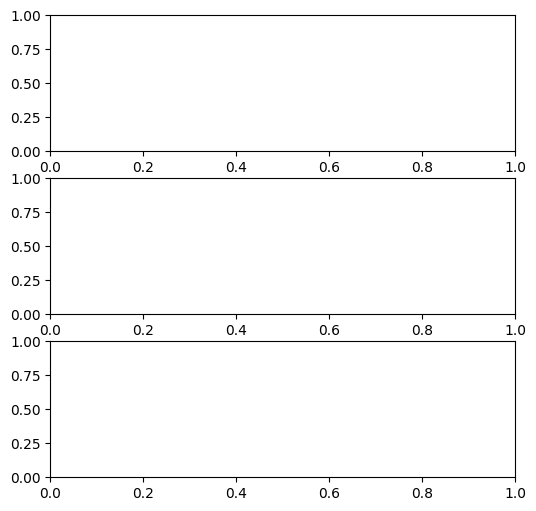

In [3]:
GAME_SCALE = SCREEN_WIDTH

sim_settings = {
    "bounds": np.array([0.05, 0.95,
                        0.05, 0.95]) * GAME_SCALE,
    "speed": 0.05,
    "init_position": np.array([0.5, 0.5]) * GAME_SCALE,
    "rw_fetching": "deterministic",
    "rw_event": "move reward",
    "rw_position": np.array([0.5, 0.8]) * GAME_SCALE,
    "rw_radius": 0.1 * GAME_SCALE,
    "rw_bounds": np.array([0.2, 0.8, 0.2, 0.8]) * GAME_SCALE,
    "plot_interval": 1,
    "rendering": True,
    "rendering_pcnn": True,
    "render_game": True,
    "room": "square",
    "use_game": False,
    "max_duration": None,
    "seed": None
}

""" PCNN """
N = 144



# --- Square PCNN
gcn = pclib.GridNetworkSq([pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1., 1., -1., 1.]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1., 1., -1., 1.]),
                           pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1., 1., -1., 1.]),])

space = pclib.PCNNsq(N=N, Nj=len(gcn), gain=7., offset=1.4,
                       clip_min=0.01,
                       threshold=0.5,
                       rep_threshold=0.85,
                       rec_threshold=0.1,
                       num_neighbors=8, trace_tau=0.1,
                       xfilter=gcn, name="2D")

pcnn2d = smc.PCNNplotter(space,
                     max_iter=100_000)

# --- hard-coded PCNN

da = pclib.BaseModulation(name="DA", size=N, min_v=0.1, lr=0.1, tau=1, clip=0.05,
                          offset=0.1, gain=50.0)
bnd = pclib.BaseModulation(name="BND", size=N, min_v=0.9, clip=0.1,
                           tau=1, lr=0.2, offset=0.9,
                           gain=50.0)
circuit = pclib.Circuits(da, bnd)

wrec = space.get_wrec()
trgp = pclib.TargetProgram(0., wrec,
                           da, 20, 0.)

eval_net = pclib.OneLayerNetwork([-1., 1., 1., 2.])
expmd = pclib.ExperienceModule(speed=sim_settings["speed"],
                               circuits=circuit,
                               trgp=trgp, space=space, eval_network=eval_net,
                               max_depth=20, action_delay=1.0)

brain = pclib.Brain(circuit, space, trgp, expmd)

pcnn2D_plotter = utc.PlotPCNN(model=space,
                bounds=sim_settings["bounds"],
                visualize=sim_settings["rendering_pcnn"],
                number=0)
# --- room
room = make_room(name="Square.v0", thickness=5.)
room_bounds = [room.bounds[0]+10, room.bounds[2]-10,
               room.bounds[1]+10, room.bounds[3]-10]

# --- objects
body = objects.AgentBody(
            position=sim_settings["init_position"],
            possible_positions=None,
            bounds=room_bounds)
reward_obj = objects.RewardObj(
            position=sim_settings["rw_position"],
            radius=sim_settings["rw_radius"],
            fetching=sim_settings["rw_fetching"],
            bounds=room_bounds)
logger(reward_obj)

# --- env
env = Environment(room=room,
                        agent=body,
                        reward_obj=reward_obj,
                        scale=GAME_SCALE,
                        rw_event=sim_settings["rw_event"],
                        verbose=False,
                        visualize=sim_settings["render_game"])
logger(env)

observation = {
    "position": env.position,
    "collision": False,
    "reward": 0.
}

# --- record
reward_count = 0
trajectory = [env.position.tolist()]
velocity = np.zeros(2)





In [26]:
clock = pygame.time.Clock()
last_position = np.zeros(2)

# [position, velocity, collision, reward, done, terminated]
observation = [env.position, np.array([0., 0.]), 0., 0.,
               False, False]
# observation = {
#     "position": env.position,
#     "collision": 0.,
#     "reward": 0.
# }

expmd = brain.get_expmd()

running = True
while running:

    # Event handling
    if env.visualize:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

    # step
    velocity = brain(observation[1],
                     observation[2],
                     observation[3],
                     observation[0])
    if not isinstance(velocity, np.ndarray):
        velocity = np.array(velocity)

    observation = env(velocity=velocity)

    pcnn2d(brain.get_representation(),
           observation[0] / env.scale)

    # reset agent's brain
    if observation[4]:
        logger.info(">> Game reset <<")
        brain.reset(position=env.agent.position)

    # render
    if env.visualize:
        #env.render()

        if env.t % 200 == 0:
            # if pcnn_plotter is not None:
            #     pcnn_plotter.render(np.array(
            #         env.agent.trajectory),# /\
            #         # env.scale,
            #         customize=True,
            #         draw_fig=True,
            #         render_elements=True, 
            #         alpha_nodes=0.5,
            #         alpha_edges=0.2)

            # if element is not None:
            #     # element.render_circuits()
            #     element.circuits["DA"].render_field()
            #     element.circuits["Bnd"].render_field()

            # #
            # if renderer_da:
            #     renderer_da.render()

            pcnn2d.render()
            plt.pause(0.001)

        #clock.tick(FPS)

    # exit 1
    if observation[4]:
        running = False

pygame.quit()




KeyboardInterrupt: 

In [3]:
pcnn2d.render()
plt.show()

In [9]:
traj = np.array(pcnn2d.trajectory)
record = np.array(pcnn2d.record_pcnn)

centers = pcnn2d.pcnn2D.get_centers()

plt.figure(figsize=(15, 15))
for i, ax in enumerate(pcnn2d.axs):

    plt.subplot(9, 9, i+1)

    plt.plot(traj[:, 0], traj[:, 1],
            "k", alpha=0.3, lw=0.4)
    plt.scatter(traj[:, 0], traj[:, 1],
               c=record[:, i], cmap="plasma",
               s=10*record[:, i],
               alpha=0.9)

    #plt.scatter(centers[i, 0], centers[i, 1],
    #           c="k", s=15)
    #plt.axis("off")
    #plt.title(f"{np.sum(record[-1, i]):.3f}")
    #plt.xlim(0, 20)
    #plt.ylim(0, 20)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [21]:
record

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05732344, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05732344, 0.        , ..., 0.        , 0.        ,
        0.        ]])

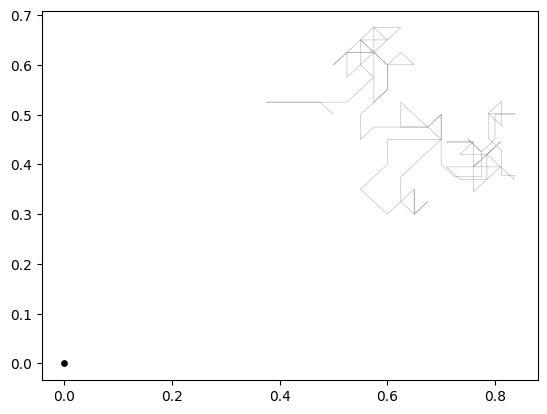

In [13]:
plt.plot(traj[:, 0], traj[:, 1],
            "k", alpha=0.3, lw=0.4)
plt.scatter(traj[:, 0], traj[:, 1],
               c=record[:, i], cmap="plasma",
               s=5*record[:, i],
               alpha=0.4)
plt.scatter(centers[i, 0], centers[i, 1],
               c="k", s=15)
plt.show()

## other studies

In [2]:
gcn = pclib.GridNetworkSq([
       pclib.GridLayerSq(sigma=0.04, speed=0.1, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.08, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.07, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.05, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.03, bounds=[-1, 1, -1, 1]),
       pclib.GridLayerSq(sigma=0.04, speed=0.005, bounds=[-1, 1, -1, 1])])

space = pclib.PCNNsqv2(N=50,
                       Nj=len(gcn),
                       gain=10.,
                       offset=1.3,
                       clip_min=0.01,
                       threshold=0.4,
                       rep_threshold=0.92,
                       rec_threshold=4.,
                       num_neighbors=4,
                       xfilter=gcn,
                       name="2D")



[+] GridNetwork created


In [3]:
n = 5
C = np.ones((n, n)) - np.eye(n)
C

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [4]:
def angle_between_vectors(v1, v2):

    dot_product = (v1.reshape(1, -1) @ v2.reshape(-1, 1)).item()
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    cos_theta = dot_product / (norm_v1 * norm_v2)
    return np.arccos(cos_theta)

def angle_between_vectors2(v1, v2):

    #dot_product = (v1.reshape(1, -1) @ v2.reshape(-1, 1)).item()
    #norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    #cos_theta = dot_product / (norm_v1 * norm_v2)
    return np.arccos(norm_v2)

In [5]:
angle_between_vectors(np.array([1., 0.]), np.array([0., 1.]))

1.5707963267948966

In [6]:
centers = np.random.uniform(0, 10, size=(5, 2))

[[3.18781312 3.38874253]
 [7.54567977 3.38340714]
 [7.23979364 1.7597023 ]
 [5.23673457 6.42626072]
 [9.2612466  0.36593787]]


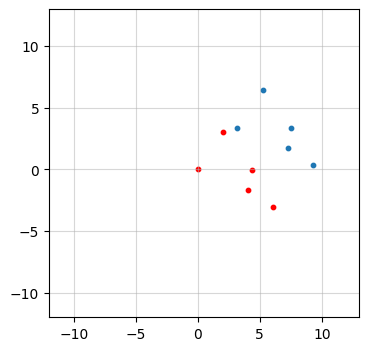

In [44]:
n = 5
idx = 0
#centers = np.random.uniform(0, 10, size=(5, 2))
print(centers)
plt.figure(figsize=(4, 4))
plt.scatter(*centers.T, s=10)
plt.scatter(*(centers-centers[idx]).T, s=10, color="red")

plt.ylim((-12, 13))
plt.xlim((-12, 13))
#plt.xticks(range(0, 13), range(0, 13))
#plt.yticks(range(0, 13), range(0, 13))
plt.grid(alpha=0.5)
plt.show()

In [46]:
neighbors = C[idx]
center = centers[idx]
logger(f"{neighbors=}")
logger(f"{center=}")

max_angle_gap = 0.
angles = []
anglesd = []
k_addup = 0

for i in range(n):
    if i == idx: 
        k_addup = 1
        continue
    if C[idx, i] <= 0.: continue
    neighbor_center = centers[i]
    #angles += [angle_between_vectors(np.array([0, 1]), neighbor_center-center)]
    angle_ = np.arctan2((neighbor_center-center)[1], (neighbor_center-center)[0])
    angle_ = angle_ if angle_ >= 0 else angle_ + 2 * np.pi
    angles += [angle_]
    anglesd += [np.degrees(angle_)]
    logger()
    logger.debug(f"{i}. neighbor_center={neighbor_center} [{neighbor_center-center}]\tangle={np.degrees(angles[i-k_addup]):.3f}°")
    logger.debug(f"### {anglesd=} ###")
    if i > 0:
        for previous_angle in angles[:-1]:
            angle_gap = min((abs(angles[-1] - previous_angle),
                             2*np.pi-abs(angles[-1] - previous_angle)))
        #logger.debug(f"   diff (1): {np.degrees(angle_gap_1)}")
        #logger.debug(f"   diff (2): {np.degrees(angle_gap_2)}")
            if angle_gap > max_angle_gap:
                max_angle_gap = angle_gap
                logger.debug(f"1)+{np.degrees(max_angle_gap)}°")

        #if angle_gap_1 > max_angle_gap:
        #    max_angle_gap = angle_gap_1
        #    logger.debug(f"1)+{np.degrees(max_angle_gap)}°")
        #if angle_gap_2 > max_angle_gap:
        #    max_angle_gap = angle_gap_2
        #    logger.debug(f"2)+{np.degrees(max_angle_gap)}°")


logger(f"{max_angle_gap=}")
max_angle_gap = max((max_angle_gap, 2*np.pi-max_angle_gap))
logger(f"{max_angle_gap=} [{np.degrees(max_angle_gap)}]")

2025-02-03 17:19:36 | neighbors=array([0., 1., 1., 1., 1.])
2025-02-03 17:19:36 | center=array([3.18781312, 3.38874253])
2025-02-03 17:19:36 | 
2025-02-03 17:19:36 | 1. neighbor_center=[7.54567977 3.38340714] [[ 4.35786665 -0.00533538]]	angle=359.930°
2025-02-03 17:19:36 | ### anglesd=[359.9298521773645] ###
2025-02-03 17:19:36 | 
2025-02-03 17:19:36 | 2. neighbor_center=[7.23979364 1.7597023 ] [[ 4.05198052 -1.62904023]]	angle=338.098°
2025-02-03 17:19:36 | ### anglesd=[359.9298521773645, 338.0981192208051] ###
2025-02-03 17:19:36 | 1)+21.83173295655945°
2025-02-03 17:19:36 | 
2025-02-03 17:19:36 | 3. neighbor_center=[5.23673457 6.42626072] [[2.04892145 3.0375182 ]]	angle=55.999°
2025-02-03 17:19:36 | ### anglesd=[359.9298521773645, 338.0981192208051, 55.99883893554528] ###
2025-02-03 17:19:36 | 1)+56.06898675818071°
2025-02-03 17:19:36 | 1)+77.90071971474016°
2025-02-03 17:19:36 | 
2025-02-03 17:19:36 | 4. neighbor_center=[9.2612466  0.36593787] [[ 6.07343348 -3.02280466]]	angle=333.

In [47]:
out = space.calculate_angle_gap(idx, centers, C)
logger(f"{out=}")

2025-02-03 17:19:39 | out=4.844007968902588


Neighbor center: 
4.357866, -0.005335
Angle: 359.929840 [6.281961]
Neighbor center: 
4.051981, -1.629040
Angle: 338.098145 [5.900926]
+Max angle gap: 0.381035
Neighbor center: 
2.048921, 3.037519
Angle: 55.998844 [0.977364]
+Max angle gap: 0.978588
+Max angle gap: 1.359624
Neighbor center: 
6.073434, -3.022804
Angle: 333.540039 [5.821372]
+Max angle gap: 1.439177
